# Domaci 2 - Bank Marketing

## Priprema podataka

### 1) Učitati skup podataka Bank Marketing

In [1]:
#!pip install numpy pandas matplotlib seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bank-additional.csv', sep=';')
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2.0,999,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4.0,999,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1.0,999,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3.0,999,2.0,failure,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,4.0,999,0.0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,2.0,999,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1.0,999,1.0,failure,-0.1,93.200,-42.0,4.153,5195.8,no
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,1.0,999,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191,no


In [3]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1.0,999,0.0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1.0,999,0.0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2.0,999,1.0,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1.0,999,0.0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1.0,999,0.0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


### 2) Analizirati skup podataka

In [4]:
m, n = df.shape
print("Skup podataka ima {} redova i {} kolona.".format(m,n))

#df.shape vraca tuple pri cemu prvi broj predstavlja broj instanci, a drugi broj atributa

Skup podataka ima 4119 redova i 21 kolona.


#### 2.1) Odrediti tipove podataka atributa

In [5]:
df.dtypes
# zakljucak: od 21 varijable, njih 12 je kategorickog, a 9 numerickog tipa

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays               int64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed        object
y                  object
dtype: object

In [6]:
#prikaz varijabli koje imaju odredjene vrednosti

#1. prikaz kategorickih varijabli za prvih 5 instanci
df.select_dtypes(exclude=['int','float']).head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,nr.employed,y
0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,nonexistent,5099.1,no
1,services,single,high.school,no,no,no,telephone,may,fri,nonexistent,5191,no
2,services,married,high.school,no,yes,no,telephone,jun,wed,nonexistent,5228.1,no
3,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,nonexistent,5228.1,no
4,admin.,married,university.degree,no,yes,no,cellular,nov,mon,nonexistent,5195.8,no


In [7]:
#2. prikaz numerickih varijabli za prvih 5 instanci
df.select_dtypes(include=['int','float']).head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
0,30,487.0,2.0,999,0.0,-1.8,92.893,-46.2,1.313
1,39,346.0,4.0,999,0.0,1.1,93.994,-36.4,4.855
2,25,227.0,1.0,999,0.0,1.4,94.465,-41.8,4.962
3,38,17.0,3.0,999,0.0,1.4,94.465,-41.8,4.959
4,47,58.0,1.0,999,0.0,-0.1,93.200,-42.0,4.191


In [8]:
df.columns
#lista sa nazivima svih varijabli u DF-u

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

#### 2.2) Raspodele vrednosti

In [9]:
df['marital'].value_counts()

marital
married     2509
single      1153
divorced     446
unknown       11
Name: count, dtype: int64

In [10]:
# df[marital] - vrsimo pristup koloni marital
# preko metode value_counts() se vraca broj projavljivanja svake jedinstvene vrednosti u seriji podataka marital

##### Vizualizacija podataka

In [11]:
# Biblioteke seaborn i matplotlib se koriste za vizualizaciju respodele vrednosti

Raspodela kategoricke promenljive

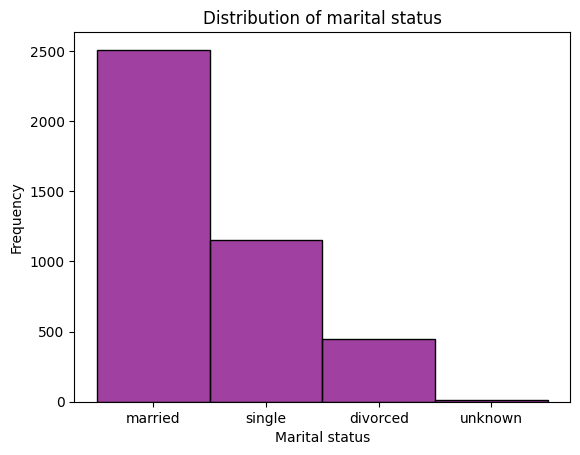

In [12]:
sns.histplot(df['marital'], color = 'purple')
plt.title('Distribution of marital status')
plt.xlabel('Marital status')
plt.ylabel('Frequency')
plt.show()

In [13]:
# Ono sto mozemo zapaziti jeste da raspodela ove kategoricke promenljive nije normalna. Najveci broj klijenata je u braku.

Na slican nacin mozemo i za sve ostale kategoricke promenljive predstaviti raspodelu, koristeci for petlju.

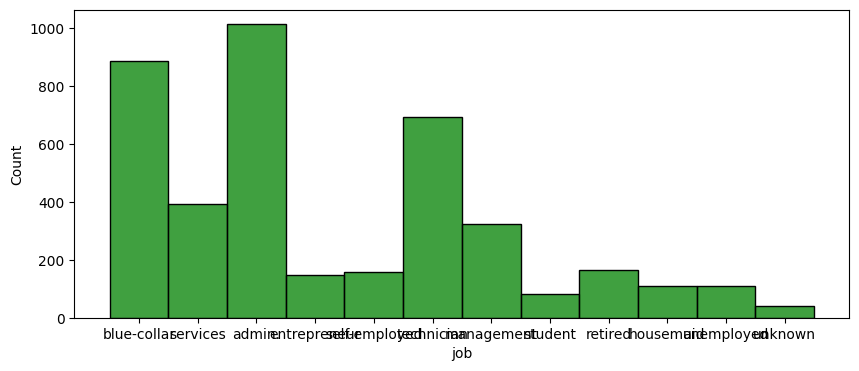

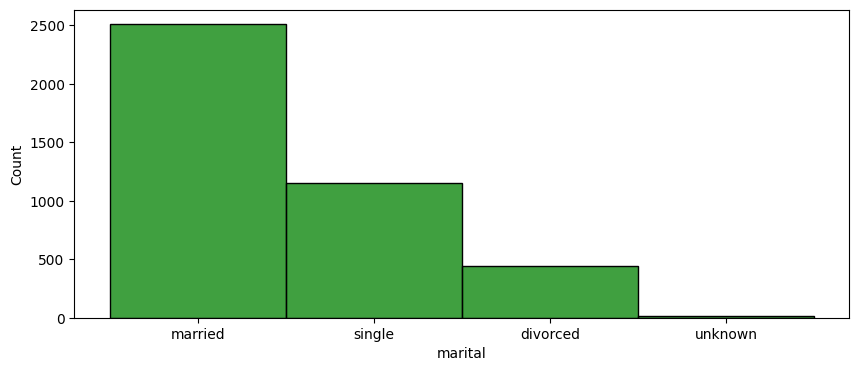

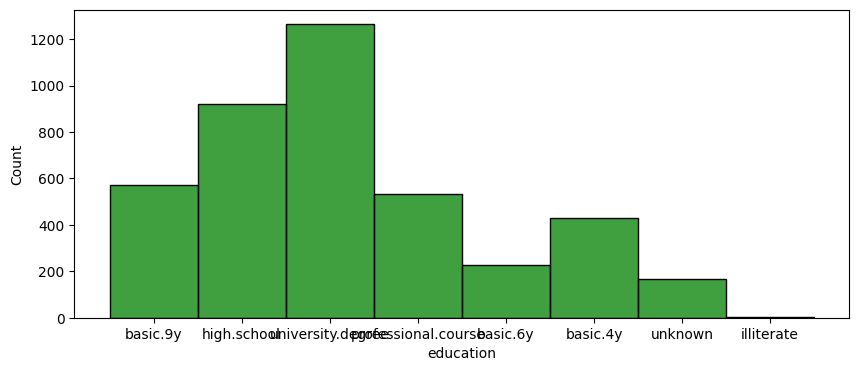

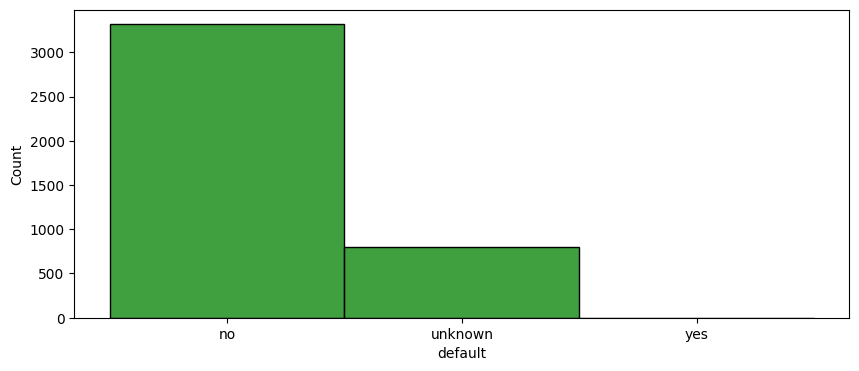

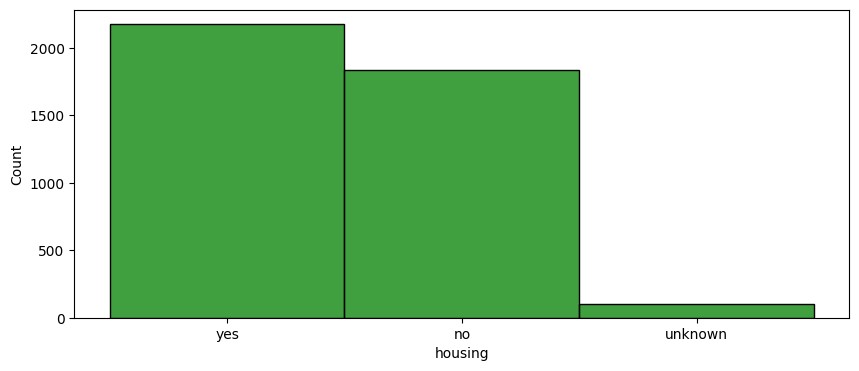

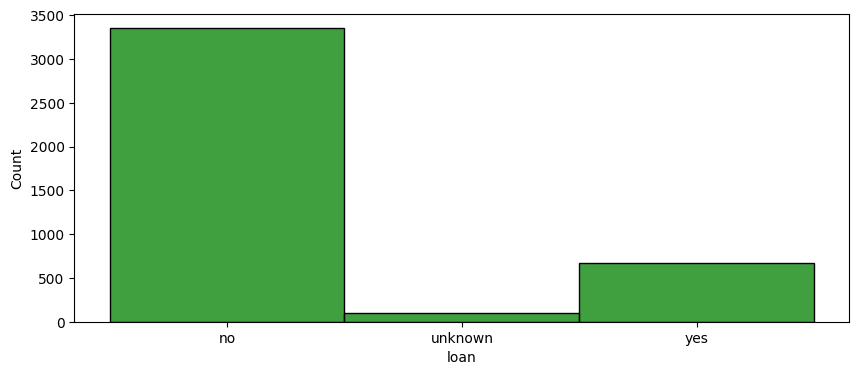

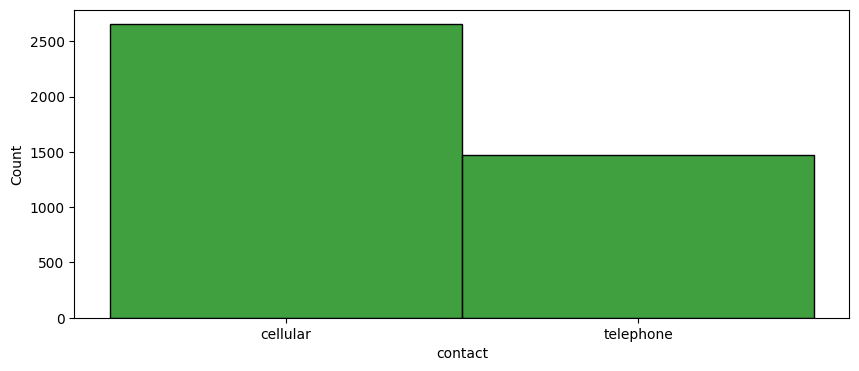

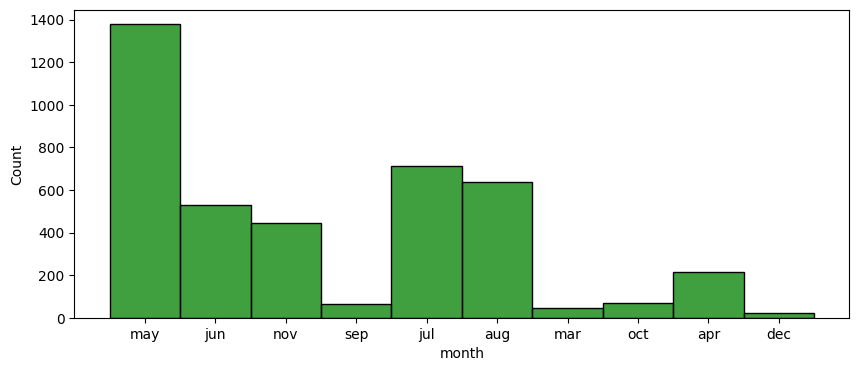

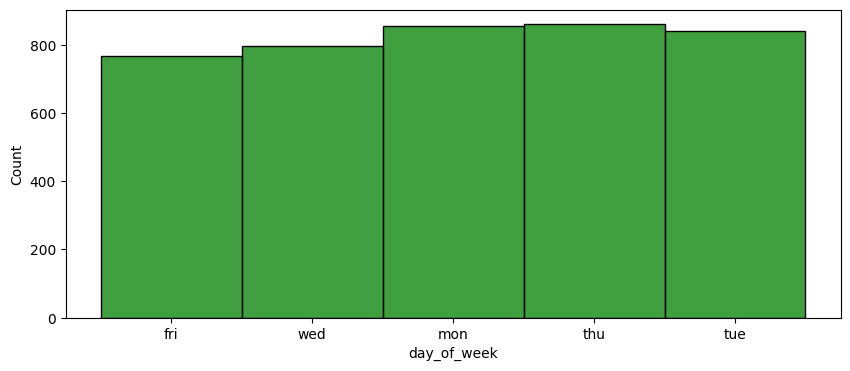

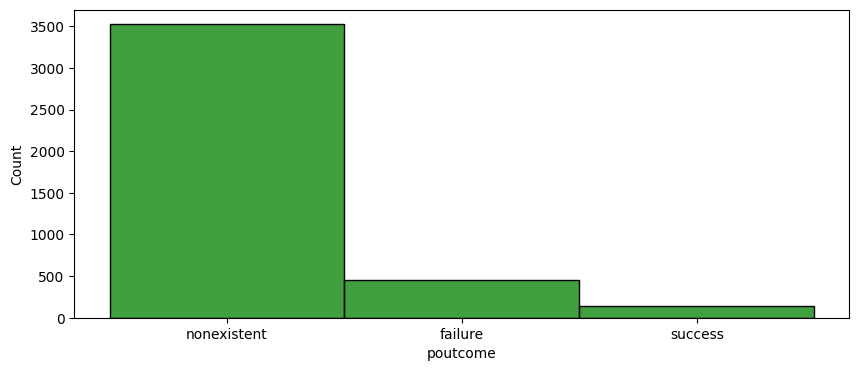

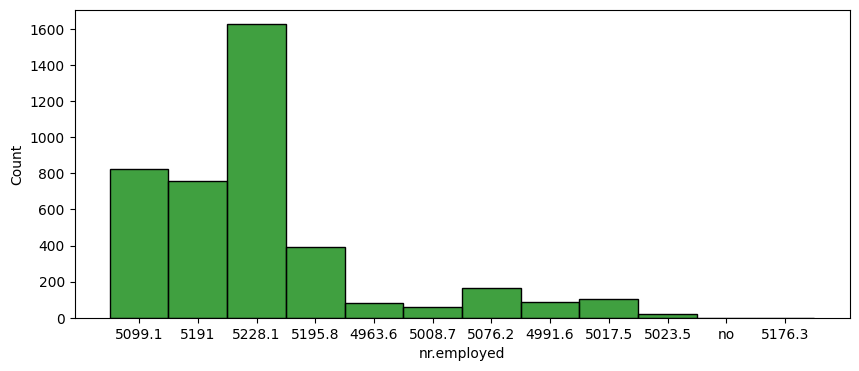

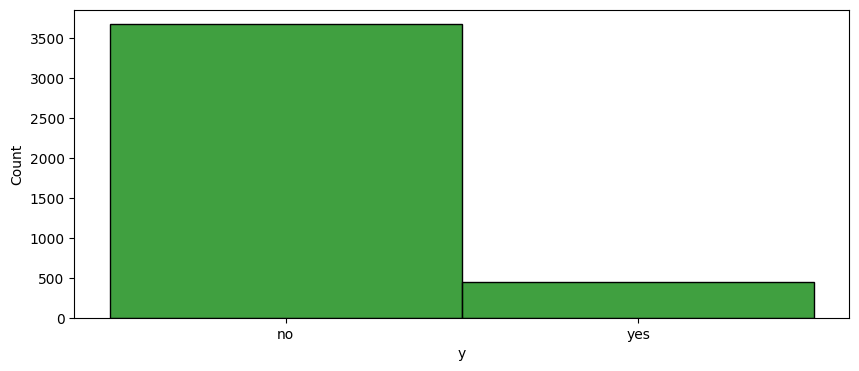

In [14]:
for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10,4))
    sns.histplot(df[col], color = 'green')
    plt.show()

In [15]:
#for col in df.select_dtypes(include=['object']).columns:
#    plt.figure(figsize=(10,4))
#    sns.countplot(data=df, x=col)
#    plt.title(f'Raspodela za {col}')
#    plt.xticks(rotation=45)
#    plt.show()

Barplotovi nam prikazuju raspodelu izlazne varijable u odnosu na svaku od kategorickih varijabli

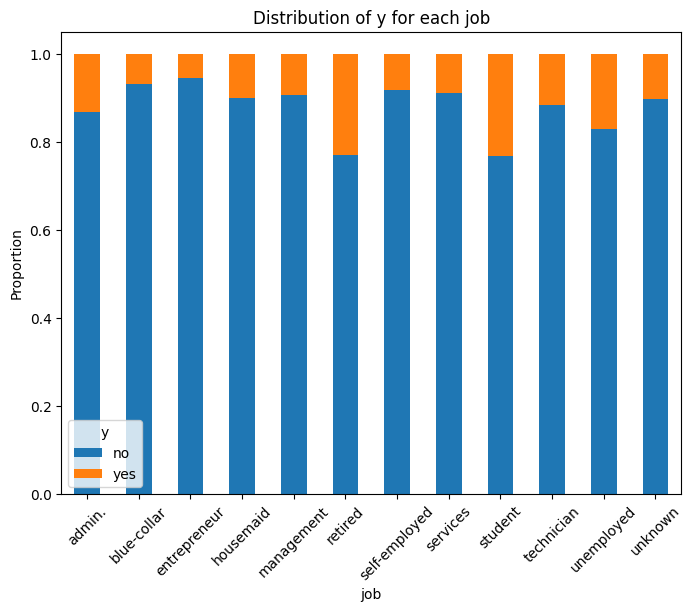

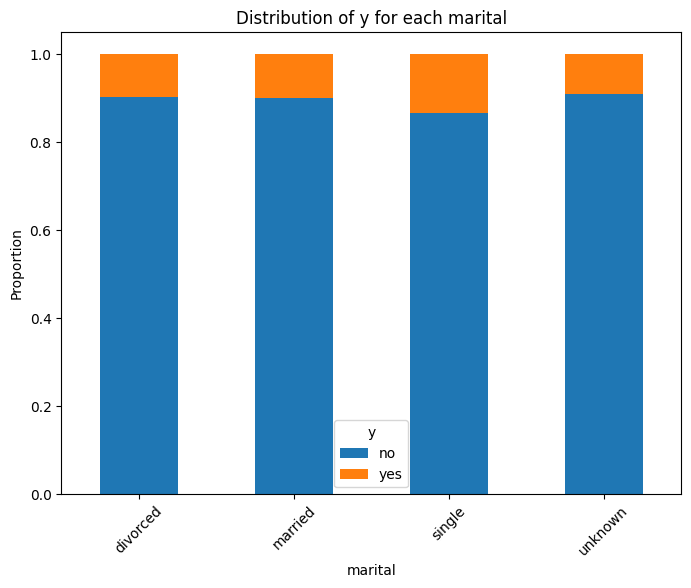

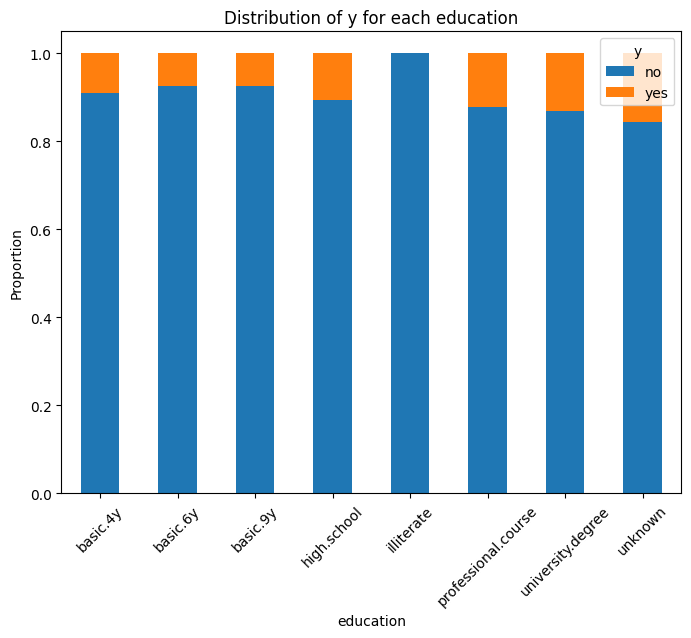

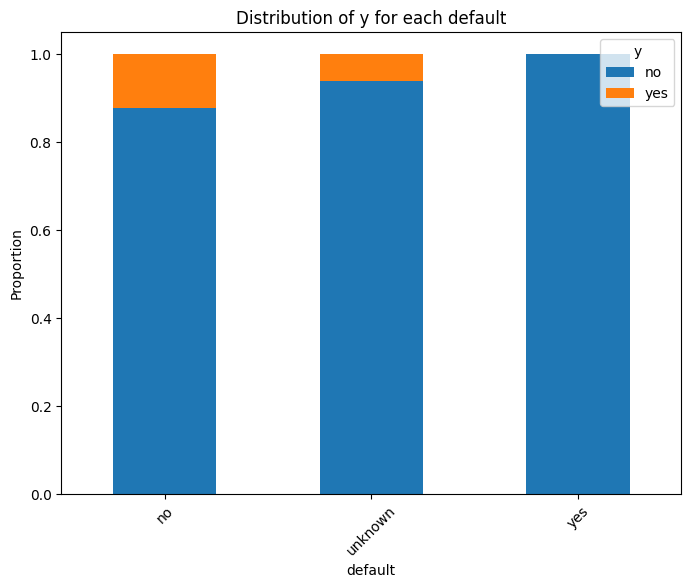

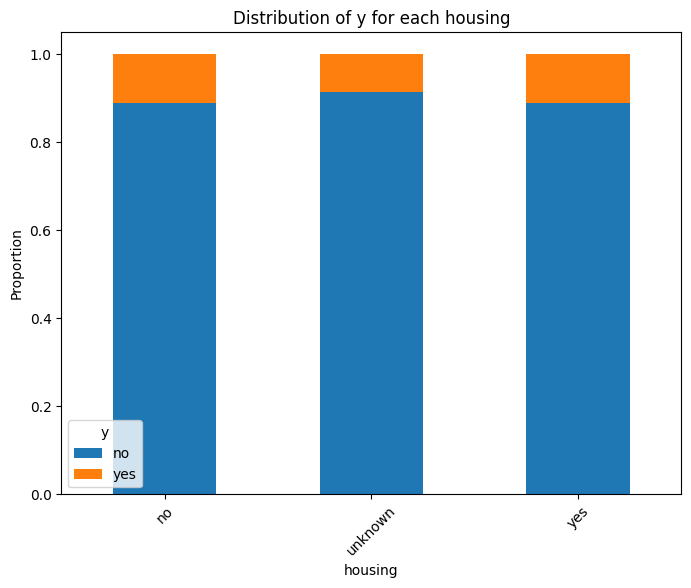

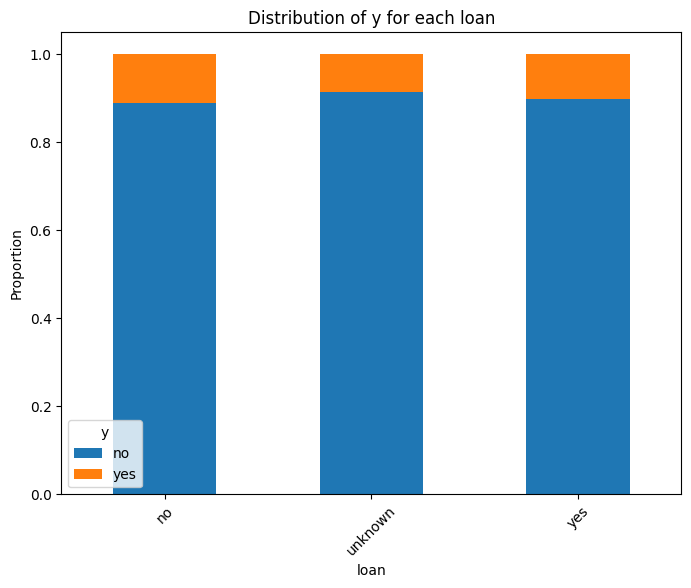

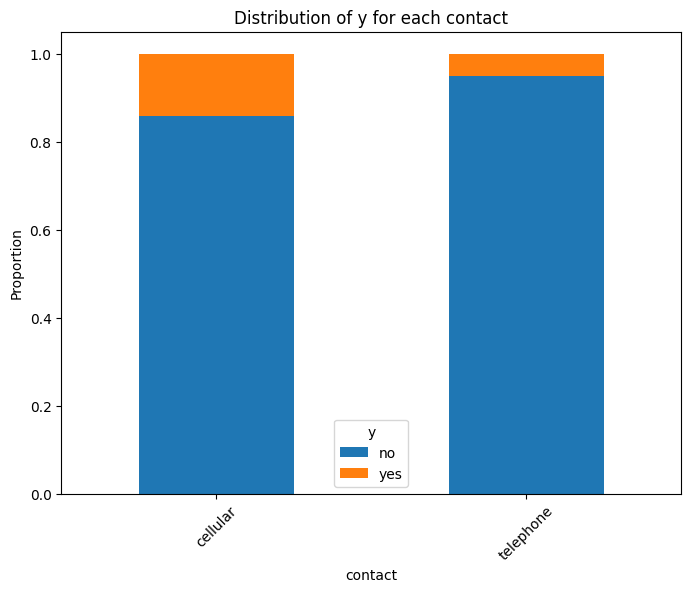

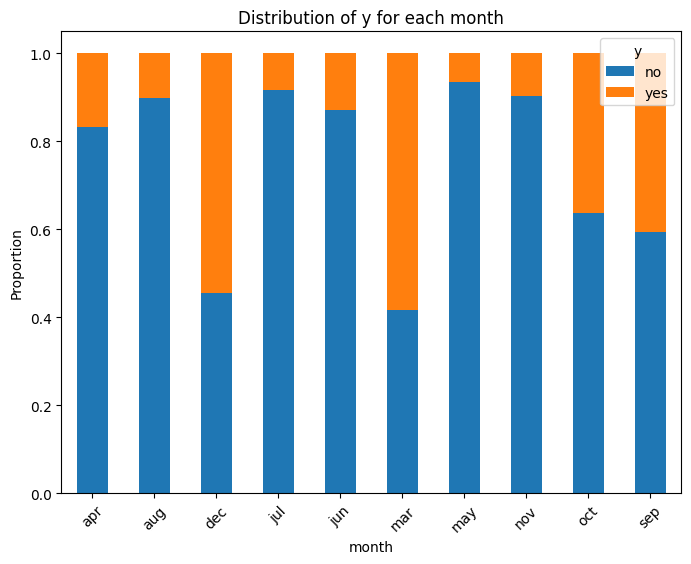

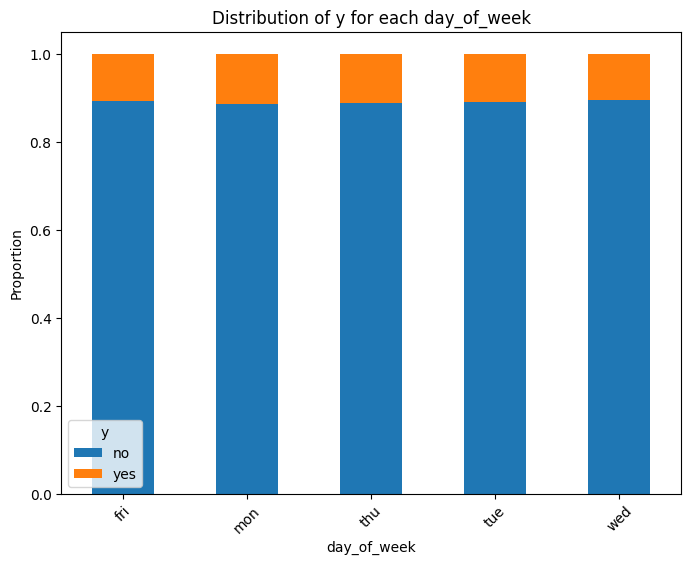

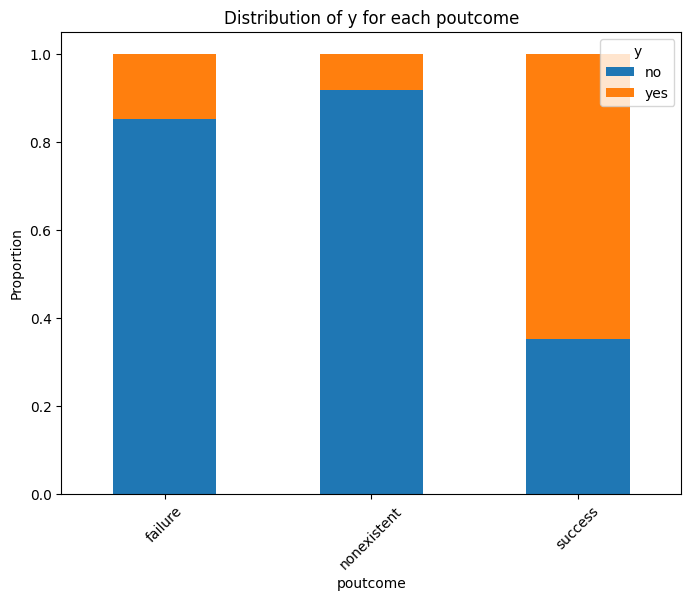

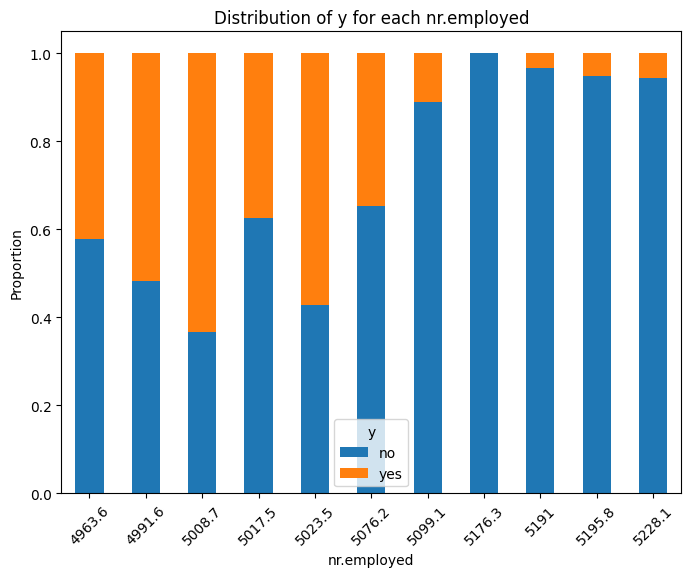

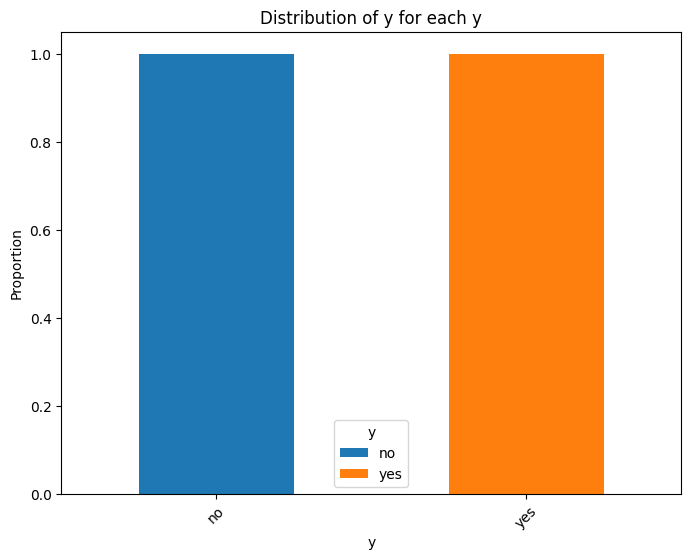

In [16]:
for col in df.select_dtypes(include=['object']).columns:
    ctab = pd.crosstab(index=df[col], columns=df['y'], normalize='index')
    ctab.plot(kind='bar', stacked=True, figsize=(8, 6))
    plt.title(f'Distribution of y for each {col}')
    plt.xticks(rotation=45)
    plt.ylabel('Proportion')
    plt.show()

Raspodela numericke promenljive

In [17]:
# Raspodela numericke promenljive 'age'

Text(0, 0.5, 'Count')

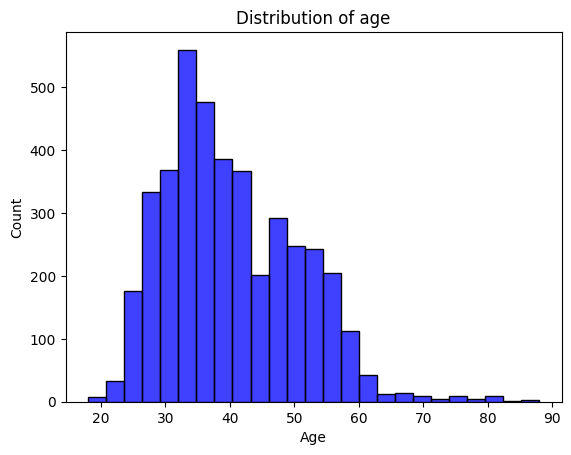

In [18]:
sns.histplot(df['age'], bins = 25, color = 'blue')
plt.title('Distribution of age')
plt.xlabel('Age')
plt.ylabel('Count')

Na slican nacin mozemo i za sve ostale numericke promenljive predstaviti raspodelu.

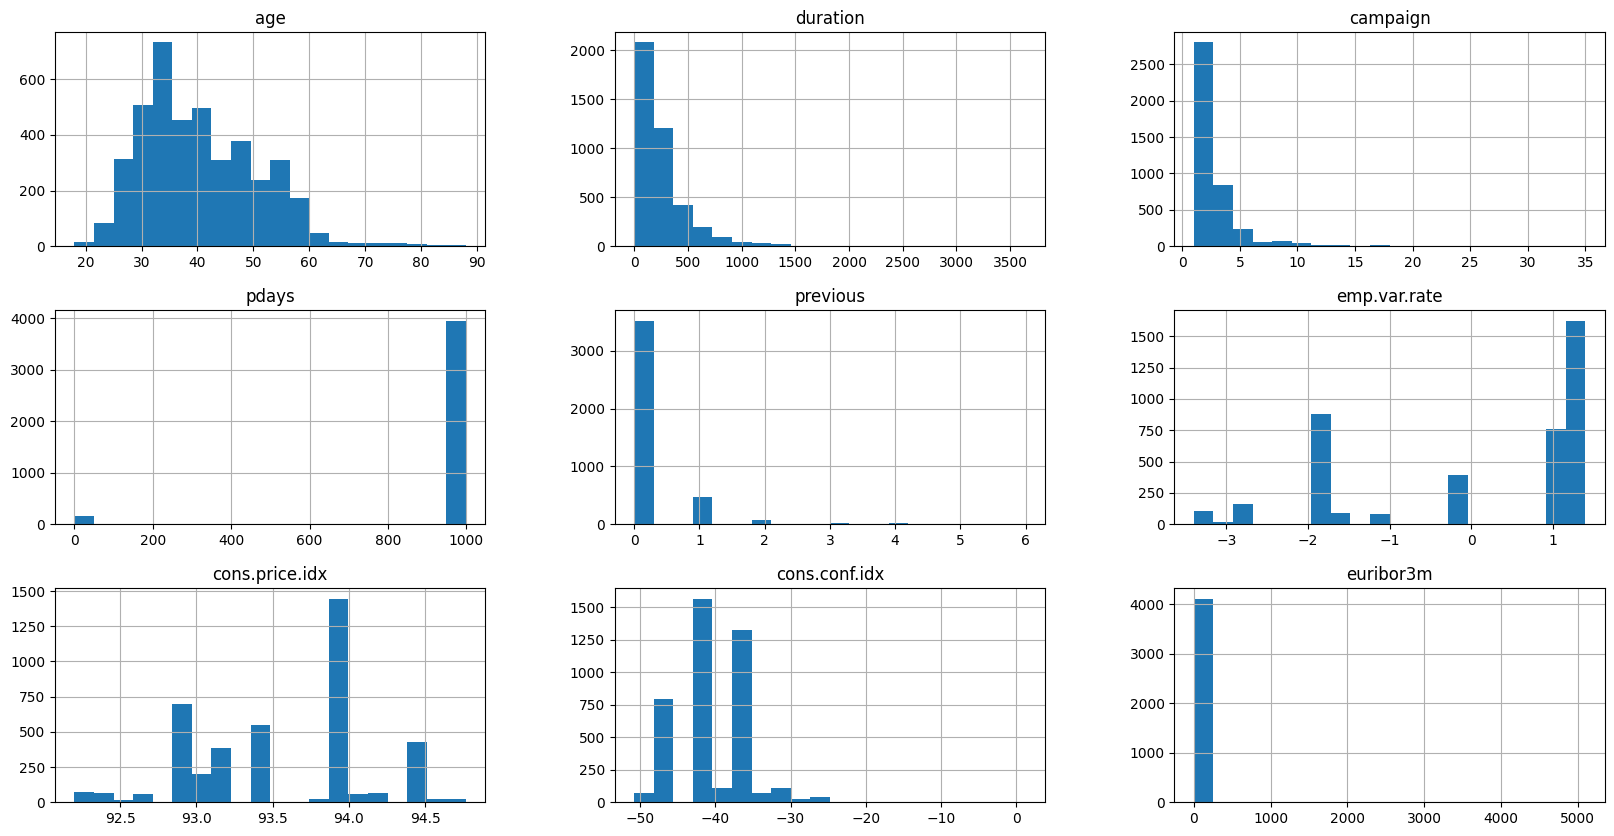

In [19]:
df.hist(bins = 20, figsize=(20,10))
plt.show()

In [20]:
# Mozemo zakljuciti da nijedna numericka promenljiva nema normalnu raspodelu, sudeci po ovim vizuelnim podacima.

Box plot-ovi nam pomazu da uvidimo probleme sa autlajerima.

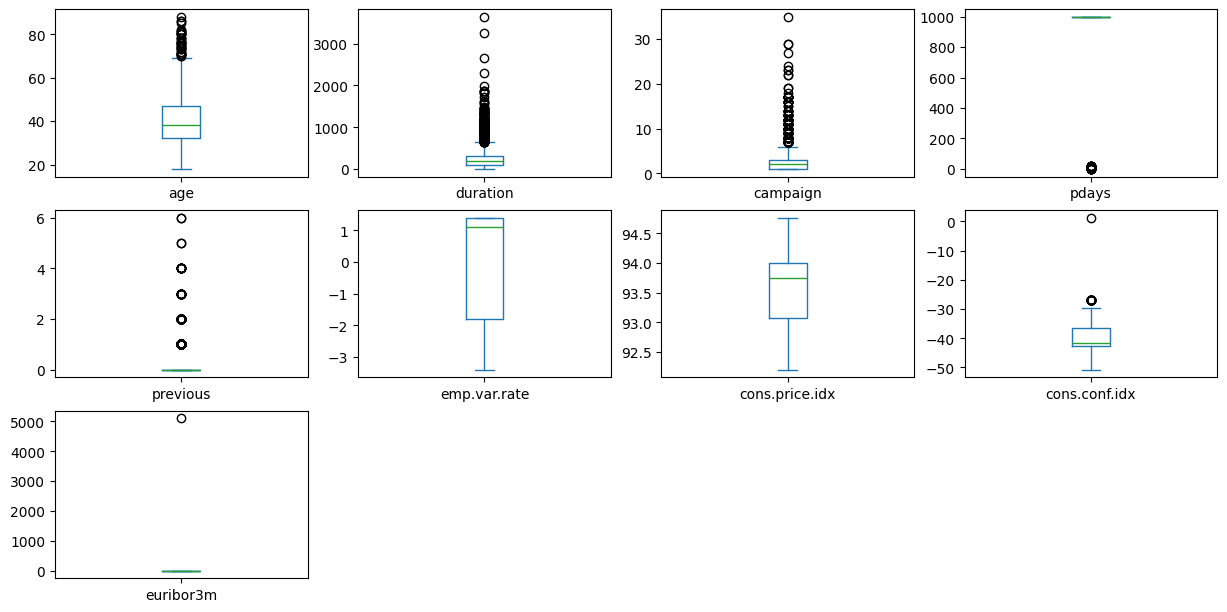

In [21]:
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15,10))
plt.show()

In [22]:
df['pdays'].value_counts()

pdays
999    3959
3        52
6        42
4        14
7        10
10        8
12        5
5         4
2         4
1         3
9         3
16        2
13        2
18        2
0         2
15        2
19        1
17        1
11        1
21        1
14        1
Name: count, dtype: int64

In [23]:
#Pozvali smo funkciju value_count() nad kolonom 'pdays' kako bismo videli broj instanci za svaku jedinstvenu vrednost.
#Dolazimo do zakljucka da ima 3959 klijenata kod kojih je vrednost ovog atributa 999, a iz skupa podataka mozemo
#primetiti da ta vrednost oznacava da klijent uopste nije pozvan, odnosno cak 3959 klijenata.

In [24]:
df['euribor3m'].value_counts()

euribor3m
4.857    274
4.963    256
4.962    237
4.961    212
4.856    138
        ... 
0.889      1
4.343      1
0.749      1
3.329      1
0.965      1
Name: count, Length: 235, dtype: int64

In [25]:
df['month'].value_counts()

month
may    1378
jul     711
aug     636
jun     530
nov     446
apr     215
oct      69
sep      64
mar      48
dec      22
Name: count, dtype: int64

In [26]:
#Mozemo zakljuciti da je maj najcesci mesec za ostavrivanje poslednjeg kontakta u godini, nakon toga tu su i jul, avgust, jun...

In [27]:
df['campaign'].value_counts()

campaign
1.0     1764
2.0     1038
3.0      548
4.0      290
5.0      142
6.0       99
7.0       59
8.0       36
9.0       31
10.0      20
11.0      19
12.0      16
17.0      14
13.0      11
16.0       7
14.0       6
15.0       2
22.0       2
19.0       2
23.0       2
29.0       2
27.0       1
18.0       1
24.0       1
35.0       1
Name: count, dtype: int64

In [28]:
# Vecina kontakata tokom kampanje se vrsi tek nekoliko puta, a najcesce samo jednom.

#### 2.3) Nedostajuce vrednosti

Izlistavanje numerickih varijabli sa nedostajucim NA vrednostima.

In [29]:
df.select_dtypes(include=['int', 'float']).isna().sum()

age               0
duration          3
campaign          5
pdays             0
previous          2
emp.var.rate      3
cons.price.idx    2
cons.conf.idx     2
euribor3m         2
dtype: int64

Izlistavanje kategorickih varijabli sa nedostajucim NA vrednostima.

In [30]:
df.select_dtypes(exclude=['int', 'float']).isna().sum()

job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
poutcome       0
nr.employed    1
y              1
dtype: int64

Izlistavanje kategorickih varijabli sa vrednostima koje imaju string vrednost 'unknown'.

In [31]:
unknown_counts = df.apply(lambda x: (x == 'unknown').sum())
unknown_counts 

age                 0
job                39
marital            11
education         167
default           803
housing           105
loan              105
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
y                   0
dtype: int64

#### 2.4) Deskriptivne statistike

In [32]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
count,4119.000000,4116.000000,4114.000000,4119.000000,4117.000000,4116.000000,4117.000000,4117.000000,4117.000000
mean,40.113620,256.869048,2.534273,960.422190,0.190430,0.084694,93.579540,-40.486358,4.858993
std,10.313362,254.763913,2.566673,191.922786,0.541904,1.563361,0.579442,4.639840,79.432456
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000
75%,47.000000,317.250000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,1.266000,5099.100000


Rezultat poziva metode describe() nad nasim DF su podaci:
- count: broj validnih (nenedostajucih) vrednosti svake varijable
- mean: prosecna vrednost svake varijable
- min: minimalna vrednost svake varijable
- vrednosti prvog (25%), drugog (50%) i treceg kvartila (75%) svake varijable; drugi kvartil predstavlja Medijanu
- max: maksimalna vrednost svake varijable

In [33]:
df.describe(include=['object'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,nr.employed,y
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4118,4118
unique,12,4,8,3,3,3,2,10,5,3,12,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,5228.1,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,1625,3667


Dobijamo opis podataka za kategoricke varijable:
- count: broj validnih (nenedostajucih) vrednosti varijable
- unique: broj jedinstvenih vrednosti svake varijable
- top: najucestalije vrednosti svake varijable (modus)
- freq: frekvencija tj. broj pojavljivanja dominantne vrednosti svake varijable

#### 2.5) Korelacije

In [34]:
df.select_dtypes(include=['number']).corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
age,1.000000,0.041518,-0.014027,-0.043425,0.050709,-0.018516,-0.000245,0.095475,-0.012596
duration,0.041518,1.000000,-0.084864,-0.046941,0.025650,-0.028231,0.016422,-0.035909,-0.011527
campaign,-0.014027,-0.084864,1.000000,0.058578,-0.091208,0.175731,0.144740,0.008025,0.012374
pdays,-0.043425,-0.046941,0.058578,1.000000,-0.587930,0.270708,0.058420,-0.090662,0.009715
previous,0.050709,0.025650,-0.091208,-0.587930,1.000000,-0.415220,-0.164824,-0.051946,-0.015494
emp.var.rate,-0.018516,-0.028231,0.175731,0.270708,-0.415220,1.000000,0.755721,0.189664,0.002375
cons.price.idx,-0.000245,0.016422,0.144740,0.058420,-0.164824,0.755721,1.000000,0.042221,-0.004134
cons.conf.idx,0.095475,-0.035909,0.008025,-0.090662,-0.051946,0.189664,0.042221,1.000000,0.146225
euribor3m,-0.012596,-0.011527,0.012374,0.009715,-0.015494,0.002375,-0.004134,0.146225,1.000000


Rezultat funkcije corr() nad DF-om sa numerickim varijablama je korelaciona matrica, koja se bazira na Pearsonovom koeficijentu korelacije koji meri linearnu zavisnost izmedju dve numericke varijable. Moze imati vrednost od -1 (varijable su negativno korelisane) do 1 (varijable su pozitivno korelisane), a vrednost 0 oznacava da su varijable medjusobno nekorelisane.

<Axes: >

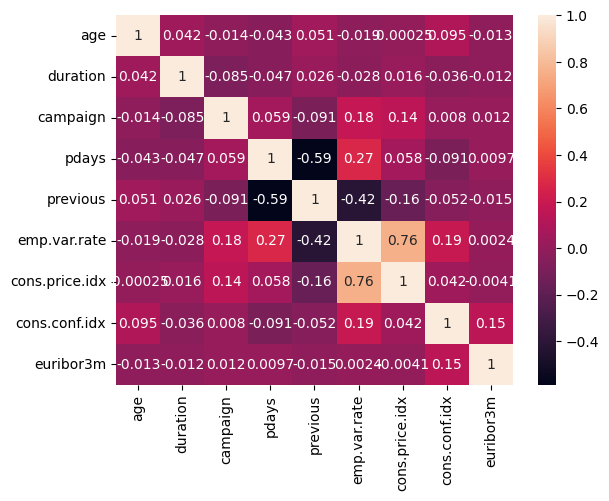

In [35]:
sns.heatmap(df[df.describe().columns].corr(), annot = True)

In [36]:
# sa data.describe().columns se selektuju samo numericke kolone iz DataFrame-a
# metoda corr racuna korelacije izmedju svih numerickih kolona DataFrame-a
# preko funkcije heatmap iz bliblioteke seaborn se iscrtava heatmap. prosledjuje se 
#korelaciona matrica, a sa annot=True se dodaju vrednosti korelacije unutar svake celije heatmap-a

Iz heatmap-a korelacione matrice mozemo uociti da postoji jaka negativna korelacija izmedju varijabli 'pdays' i 'previous', sto ce znaciti da sa porastom broja interakcija sa odredjenim klijentom opada broj dana za koje je on kontaktiran za narednu kampanju.

Takodje, moze se uociti jaka pozitivna korelacija izmedju varijabli emp.var.rate i cons.price.idx, sto znaci da se sa porastom stope zaposlenosti, cesto povecava i potrosnja.

### 3) Priprema skupa podataka

In [37]:
#!pip install scikit-learn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#### 3.1) Popunjavanje nedostajucih vrednosti

In [38]:
df.isna().sum()

# Za atribute duration, campaign, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed postoje nedostajuce vrednosti
# Atribut campaign ima najveci broj nedostajucih vrednosti (5)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          3
campaign          5
pdays             0
previous          2
poutcome          0
emp.var.rate      3
cons.price.idx    2
cons.conf.idx     2
euribor3m         2
nr.employed       1
y                 1
dtype: int64

In [39]:
df.replace('unknown', np.NaN, inplace=True)
# Pretvaranje unknown vrednosti u nan, kako bismo mogli da je tretiramo kao i preostale nedostajuce vrednosti

In [40]:
df.isna().sum()

age                 0
job                39
marital            11
education         167
default           803
housing           105
loan              105
contact             0
month               0
day_of_week         0
duration            3
campaign            5
pdays               0
previous            2
poutcome            0
emp.var.rate        3
cons.price.idx      2
cons.conf.idx       2
euribor3m           2
nr.employed         1
y                   1
dtype: int64

In [41]:
df.duplicated().sum()

# Nema duplikata u setu podataka

0

In [42]:
df['y'].isna().sum()

1

In [43]:
# Postoji jedna nedostajuca vrednost u koloni y (izlaznoj varijabli).

In [44]:
df[df['y'].isna()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
780,32,blue-collar,married,basic.4y,no,no,yes,cellular,may,thu,...,4.0,999,0.0,nonexistent,-1.8,92.893,1.266,5099.1,no,NaN


In [45]:
# Instanca koja ima nedostajucu vrednost u ciljnoj varijabli je 780. red.

In [46]:
df.iloc[775:786, 14:21]

,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
775,failure,-1.8,92.893,-46.200,1.266,5099.1,no
776,nonexistent,-0.1,93.200,-42.000,4.076,5195.8,no
777,nonexistent,-0.1,93.200,-42.000,4.153,5195.8,no
778,nonexistent,1.4,93.918,-42.700,4.961,5228.1,no
779,nonexistent,-2.9,92.963,-40.800,1.281,5076.2,yes
780,nonexistent,-1.8,92.893,1.266,5099.100,no,NaN
781,nonexistent,1.4,93.444,-36.100,4.965,5228.1,no
782,failure,-1.8,92.893,-46.200,1.250,5099.1,no
783,nonexistent,1.4,94.465,-41.800,4.961,5228.1,no
784,failure,-1.8,92.893,-46.200,1.334,5099.1,no


In [47]:
#primecujemo da su neke vrednosti permutovane(odnosno pomerene u levo)
#sada sredjujemo to
df.loc[780, 'y'] = df.loc[780, 'nr.employed']
df.loc[780, 'nr.employed'] = df.loc[780, 'euribor3m']
df.loc[780, 'euribor3m'] = df.loc[780, 'cons.conf.idx']
df.loc[780, 'cons.conf.idx'] = np.NaN

In [48]:
#sada smo ih sve vratili na prave pozicije
df['y'].isna().sum()
#nema vise NaN vrednosti u izlazu

0

In [49]:
df.isna().sum()

age                 0
job                39
marital            11
education         167
default           803
housing           105
loan              105
contact             0
month               0
day_of_week         0
duration            3
campaign            5
pdays               0
previous            2
poutcome            0
emp.var.rate        3
cons.price.idx      2
cons.conf.idx       3
euribor3m           2
nr.employed         1
y                   0
dtype: int64

In [50]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays               int64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed        object
y                  object
dtype: object

In [51]:
#nr.employed je tipa object(a ima numericke vrednosti) pa cemo ga pretvoriti u float
df['nr.employed']=df['nr.employed'].astype('float64')

In [52]:
#Sledi popunjavanje numerickih atirbuta u redovima gde je njihova vrednost nedostajuca srednjim vrednostima svih ostalih vrednosti u toj koloni.

In [53]:
df[['duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']] = df[['duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']].fillna(np.mean(df[['duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]))

In [54]:
df.isna().sum()

age                 0
job                39
marital            11
education         167
default           803
housing           105
loan              105
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
y                   0
dtype: int64

In [55]:
#default ima mnogo NA vrednosti pa cemo ga izbaciti
df = df.drop(columns=['default'])

In [56]:
#popunjavanje NA vrednosti kod kolona tipa object
kolone = df.drop(columns=['contact','month','poutcome', 'day_of_week','y'])
for k in kolone:
    df[k] = df[k].fillna(df[k].mode()[0])

# df[k].mode() vraca series objekat, i [0] nam garantuje ako bude prikazano vise modusa da uzmemo samo prvi

In [57]:
df.isna().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [58]:
# Vise nema nedostajucih vrednosti u setu podataka

#### 3.2) Kvantifikovanje kategorickih podataka

In [59]:
# Zasto kvantifikujemo podatke? Neki algoritmi masinskog ucenja rade samo sa numerickim podacima, a neki koji mogu da rade i sa kategorickim ipak
# pokazuju bolje perfomanse u radu sa numerickim. Takdoje, numericke promenljive zauzimaju malo memorije, sto je korisno kod velikih skupova podataka,
# a i cesto su lakse za analizu i vizualizaciju podataka.

In [60]:
df.dtypes

age                 int64
job                object
marital            object
education          object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays               int64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [61]:
num_cols = df.select_dtypes(include =['int64', 'float64'])
cat_cols = df.select_dtypes(include =['object'])

In [62]:
num_cols.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,257.181314,3.363450,960.422190,0.523239,0.583984,93.867003,-39.967655,3.951896,5165.378881
std,10.313362,254.933686,23.925312,191.922786,15.111317,18.562121,13.056852,20.122302,15.125672,101.491576
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,685.610264
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,318.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,685.610264,999.000000,685.610264,685.610264,685.610264,685.610264,685.610264,5228.100000


In [63]:
cat_cols.describe()

,job,marital,education,housing,loan,contact,month,day_of_week,poutcome,y
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
unique,11,3,7,2,2,2,10,5,3,2
top,admin.,married,university.degree,yes,no,cellular,may,thu,nonexistent,no
freq,1051,2520,1431,2280,3454,2652,1378,860,3523,3668


In [64]:
for cat in cat_cols:
    unique_values = cat_cols[cat].unique()
    print(f'Kolona {cat} ima sledece jedinstvene vrednosti: ')
    print(unique_values)

Kolona job ima sledece jedinstvene vrednosti: 
['blue-collar' 'services' 'admin.' 'entrepreneur' 'self-employed'
 'technician' 'management' 'student' 'retired' 'housemaid' 'unemployed']
Kolona marital ima sledece jedinstvene vrednosti: 
['married' 'single' 'divorced']
Kolona education ima sledece jedinstvene vrednosti: 
['basic.9y' 'high.school' 'university.degree' 'professional.course'
 'basic.6y' 'basic.4y' 'illiterate']
Kolona housing ima sledece jedinstvene vrednosti: 
['yes' 'no']
Kolona loan ima sledece jedinstvene vrednosti: 
['no' 'yes']
Kolona contact ima sledece jedinstvene vrednosti: 
['cellular' 'telephone']
Kolona month ima sledece jedinstvene vrednosti: 
['may' 'jun' 'nov' 'sep' 'jul' 'aug' 'mar' 'oct' 'apr' 'dec']
Kolona day_of_week ima sledece jedinstvene vrednosti: 
['fri' 'wed' 'mon' 'thu' 'tue']
Kolona poutcome ima sledece jedinstvene vrednosti: 
['nonexistent' 'failure' 'success']
Kolona y ima sledece jedinstvene vrednosti: 
['no' 'yes']


In [65]:
df['contact'] = df['contact'].map({"cellular":0,"telephone":1})

# Mapiranje atributa contact 

In [66]:
df['y'] = df['y'].map({'yes':1,'no':0})

# Mapiranje izlazne promenljive y

In [67]:
encoder = OneHotEncoder(sparse_output=False)
#Ovde se kreira objekat encoder tipa OneHotEncoder. Parametar sparse_output=False označava da želimo gustu matricu kao rezultat, a ne retku matricu (matrica sa dosta nula).
columns_to_encode = ['job','marital', 'education', 'housing', 'loan', 'month', 'day_of_week', 'poutcome']

encoded_data = encoder.fit_transform(df[columns_to_encode])
#primena enkodiranja na odredjene kolone iz ove liste
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns_to_encode))

df = pd.concat([df.drop(columns=columns_to_encode), encoded_df], axis=1)

df.head()

# Kodiranje preostalih kategorickih atributa koristeci OneHotEncoder (Ovim procesom, kategoricki atributi su kodirani u oblik koji je pogodan za analizu ili primenu u algoritmima masinskog učenja)
# OneHotEncoder transformiše jednu kategoričku promenljivu sa n kategorija u n binarnih kolona, gde svaka nova kolona predstavlja jednu od kategorija. 
# Svaka od ovih novih kolona ima vrednost 1 samo za tačke koje pripadaju toj kategoriji, dok ima vrednost 0 za sve ostale tačke.

,age,contact,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,0,487.0,2.0,999,0.0,-1.8,92.893,-46.2,1.313,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,39,1,346.0,4.0,999,0.0,1.1,93.994,-36.4,4.855,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,25,1,227.0,1.0,999,0.0,1.4,94.465,-41.8,4.962,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,38,1,17.0,3.0,999,0.0,1.4,94.465,-41.8,4.959,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,47,0,58.0,1.0,999,0.0,-0.1,93.200,-42.0,4.191,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


#### 3.3) Kreiranje izvedenih atributa

##### 3.3.1) Total Contacts

In [68]:
df['total_contacts'] = df['campaign'] + df['previous']

# Zbir koliko puta je svaki klijent kontaktiran u kampanji (campaign) i koliko puta je prethodno bio kontaktiran (previous)

##### 3.3.2) Consumer Relation Index

In [69]:
df['cons_relation_index'] = df['cons.conf.idx']/df['cons.price.idx']

# Odnos indeksa potrosackog poverenja (CCI) i indeksa potrosackih cena (CPI)

##### 3.3.3) Total Campaign Duration

In [70]:
df['total_campaign_duration'] = df['duration'] * df['campaign']

# Ukupno vreme provedeno u kampanji za svakog klijenta

### Dodatak

In [71]:
# Izbaciti pdays(nije od koristi), duration (samo za bencamring) i emp.var.rate (visoka korelacija sa cons.price.idx)

In [72]:
df = df.drop(columns=['pdays', 'duration', 'emp.var.rate'])

In [73]:
# Normalizovati numericke atribute

In [74]:
# num_cols = df.select_dtypes(include=['int64', 'float64','int32']).columns.tolist()
# scaler = MinMaxScaler()
# df[num_cols] = scaler.fit_transform(df[num_cols])

In [75]:
# Ukloniti autlajere

In [76]:
# def remove_outliers_iqr(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     return df.loc[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# for column in num_cols:
#     df = remove_outliers_iqr(df, column)


In [77]:
# df.head()

In [78]:
#df.to_csv('data/bank-cleaned.csv',index=False)

### 4) Podela skupa na trening i test

In [79]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer, accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline

In [80]:
X = df.drop(columns = 'y')
#ili X = df.drop('y',axis = 1)
Y = df['y']

#Podelili smo u dva skupa ulazne i ciljnu varijablu

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)

#Funkcija 'train_test_split()' iz podmodula sklearn.model_selection se koristi za odvajanja podataka u skup za trening i skup za test
#test_size = 0.3 sugerise da ce 30% podataka biti iskorisceno za test, a ostalih 70% za trening
#sa random_state = 10 postavljamo random_seed na 10, odnosno svaki put kad pokrenemo ovu funkciju dobicemo iste rezultate podele na trening i test deo

### 5) Klasifikacija

In [82]:
#Klasifikacija se odnosi na nadgledano masinsko ucenje gde je ciljna varijabla unapred definisana. Cilj je da model predvidi kojoj klasi odredjena instanca pripada.

#### 5.1) Decision Tree

##### 5.1.1) Ucenje

In [83]:
#Decision Tree je algoritam masinskog ucenaj koji sluzi za kalsifikaciju i regresiju. Bira se najbolji atribut za podelu podataka na osnovu odredjenog kriterijuma i onda se vrsi grananje stabla sve dok se ne dostigne maksimalni broj iteracija ili maksimalna dubina stabla.
#Prednost: intuitivan, radi i sa numerickim i kategorickim varijablama, pa se moze primeniti i na klasifikacione i na regresione probleme
#Nedostatak: veoma osetljiv na promene u podacima sto rezultira nestabilnoscu u modelu i sklon overfitting-u, cesto daje gore rezultate u odnosu na druge algoritme

In [84]:
model_tree = DecisionTreeClassifier(max_depth = 5)
model_tree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5)

In [85]:
model_tree_predictions = model_tree.predict(X_test)

In [86]:
#funkcija 'predict' zapravo predvidja vrednosti ciljne varijable za testni skup podataka koristeci prethodno trenirani model Decision Tree
#parametar koji se prosledjuje ovoj funkciji je vektor ulaznih varijabli (testni skup)

In [87]:
model_tree_probabilities = model_tree.predict_proba(X_test)
model_tree_probabilities

array([[0.98113208, 0.01886792],
       [0.98113208, 0.01886792],
       [0.98113208, 0.01886792],
       ...,
       [0.98113208, 0.01886792],
       [0.98113208, 0.01886792],
       [0.98113208, 0.01886792]])

In [88]:
#metoda 'predict_proba' se koristi da bismo dobili verovatnoce pripadanja razlicitim klasama za svaku instancu
#broj redova u ovoj matrici odgovara broju instanci, broj kolona odgovara broju klasa
#elementi matrice predstavljaju verovatnocu da odredjena instanca pripada datoj klasi

In [89]:
pd.DataFrame({'actual class' : Y_test, 'predicted class': model_tree_predictions}).head(10)

,actual class,predicted class
729,0,0
1133,0,0
986,0,0
1042,0,0
433,0,0
2427,0,0
3911,0,0
530,0,0
3082,0,0
1667,1,0


##### 5.1.2) Ocena kvaliteta modela na test skupu podataka

In [90]:
accuracy = accuracy_score(Y_test, model_tree_predictions)
precision = precision_score(Y_test, model_tree_predictions)
recall = recall_score(Y_test, model_tree_predictions)
f1 = f1_score(Y_test, model_tree_predictions)

print("METRICS")
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

METRICS
Accuracy:  0.8818770226537217
Precision:  0.4563106796116505
Recall:  0.34306569343065696
F1-score:  0.39166666666666666


In [91]:
#EVALUCIONE METRIKE
#Accuracy - koliko je model tacno klasifikovao instance A = (TP+TN)/(TP+TN+FP+FN)
#Precision - koliko je pozitivnih predikcija bilo tacno P = TP/(TP+FP)
#Recall - koliki je procenat pravih pozitivnih instanci identifikovan od strane modela R = TP/(TP+FN)
#F1-score - harmonijska sredina preciznosti i odziva F1 = 2*recall*precision/(recall+precision)
#AUC - meri koliko model dobro razlikuje pozitivne od negativnih klasa
#Ulazni parametri za ove funkcije jesu stvarne i predvidjene vrednosti ciljne varijable

In [92]:
confusion = confusion_matrix(Y_test, model_tree_predictions)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[1043   56]
 [  90   47]]


In [93]:
#KONFUZIONA MATRICA
#TP (True Positive) = confusion(1,1) - broj instanci pravilno klasifikovanih kao pozitivne - 47
#TN (True Negative) = confusion(0,0) - broj instanci pravilno klasifikovanih kao negativne - 1054
#FP (False Positive) = confusion(0,1) - broj instanci pogresno klasifikovanih kao pozitivne (Alfa greska) - 45
#FN (False Negative) = confusion(1,0) - broj instanci pogresno klasifikovanih kao negativne (Beta greska) - 90

##### 5.1.3) Ocena kvaliteta modela unakrsnom validacijom na trening skupu podataka

In [94]:
model_tree_cv = cross_val_predict(model_tree, X_train, Y_train, cv = 5)

In [95]:
acc_cv = np.mean(cross_val_score(model_tree, X_train, Y_train, cv = 5, scoring = 'accuracy'))
prec_cv = np.mean(cross_val_score(model_tree, X_train, Y_train, cv = 5, scoring = 'precision'))
rec_cv = np.mean(cross_val_score(model_tree, X_train, Y_train, cv = 5, scoring = 'recall'))
f1_cv = np.mean(cross_val_score(model_tree, X_train, Y_train, cv = 5, scoring = 'f1'))
auc_cv = np.mean(cross_val_score(model_tree, X_train, Y_train, cv = 5, scoring = 'roc_auc'))
print("CV Metrics")
print("Accuracy: ", acc_cv)
print("Precision: ", prec_cv)
print("Recall: ", rec_cv)
print("F1-score: ", f1_cv)
print("AUC: ", auc_cv)

CV Metrics
Accuracy:  0.9011427642980936
Precision:  0.5619821170168409
Recall:  0.4556067588325653
F1-score:  0.5011189875917121
AUC:  0.8385106712408588


In [96]:
#Funkciju 'cross_val_score' koristimo za izracunavavanje metrika modela tokom kros-validacije
#parametar scoring oznacava koriscenu metriku

In [97]:
confusion_cv = confusion_matrix(Y_train, model_tree_cv)
print("Confusion Matrix after Cross-Validation:")
print(confusion_cv)

Confusion Matrix after Cross-Validation:
[[2453  116]
 [ 172  142]]


##### 5.1.4) Vizuelni prikaz stabla odlucivanja

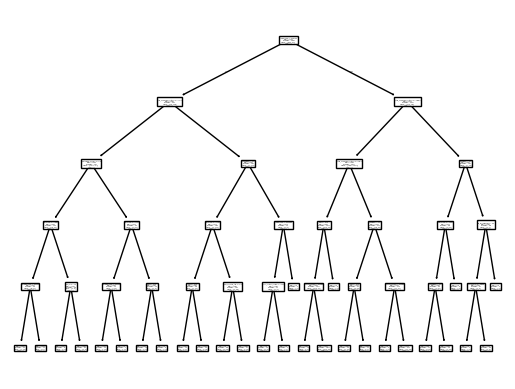

In [98]:
plt.figure()
tree.plot_tree(model_tree, feature_names = X_train.columns, class_names = ['0','1'])
plt.show()

##### 5.1.5) Podesavanje parametara stabla odlucivanja

In [99]:
#Mozemo podesiti drugacije hiperparametre stabla, npr. dubina stabla,
#minimalni broj instanci potreban za grananje unutar cvora, minimalni broj instanci u listovima, a zatim toga
#mozemo opet da odredimo evaluacione metrike.

In [100]:
new_model_tree = DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 30, min_samples_split = 4)
#Dubinu stabla cemo postaviti na 6, a minimalni broj instanci u listu na 30
new_model_tree_cv = cross_val_predict(new_model_tree, X_train, Y_train, cv = 7)
#Proci cemo ovaj put kroz 7 iteracija kros-validacije.

new_confusion = confusion_matrix(Y_train, new_model_tree_cv)
print("Confusion Matrix after Cross-Validation")
print(new_confusion)

new_acc_cv = np.mean(cross_val_score(new_model_tree, X_train, Y_train, cv = 7, scoring = 'accuracy'))
new_prec_cv = np.mean(cross_val_score(new_model_tree, X_train, Y_train, cv = 7, scoring = 'precision'))
new_rec_cv = np.mean(cross_val_score(new_model_tree, X_train, Y_train, cv = 7, scoring = 'recall'))
new_f1_cv = np.mean(cross_val_score(new_model_tree, X_train, Y_train, cv = 7, scoring = 'f1'))
new_auc_cv = np.mean(cross_val_score(new_model_tree, X_train, Y_train, cv = 7, scoring = 'roc_auc'))
print("CV Metrics")
print("Accuracy: ", new_acc_cv)
print("Precision:", new_prec_cv)
print("Recall:", new_rec_cv)
print("F1-score:", new_f1_cv)
print("AUC: ", new_auc_cv)

Confusion Matrix after Cross-Validation
[[2460  109]
 [ 166  148]]
CV Metrics
Accuracy:  0.9046134221529304
Precision: 0.582486826955468
Recall: 0.4715007215007215
F1-score: 0.518142464700375
AUC:  0.8958847918657183


In [101]:
# Mozemo zakljcuiti da se evaluacione metrike nisu naroctio promenile sa promenom hiperparamaetara.

##### 5.1.6) Prilagodjavanje granice odlcuivanja

In [102]:
threshold = 0.6
model_tree_predict_ts = model_tree.predict_proba(X_test)

pred_ts = (model_tree_predict_ts[:,1] >= threshold)

acc_ts = accuracy_score(Y_test, pred_ts)
prec_ts = precision_score(Y_test, pred_ts)
rec_ts = recall_score(Y_test, pred_ts)
f1_ts = f1_score(Y_test, pred_ts)
print("EVALUATION METRICS")
print("Accuracy: ", acc_ts)
print("Precision: ", prec_ts)
print("Recall: ", rec_ts)
print("F1-score: ", f1_ts)

EVALUATION METRICS
Accuracy:  0.8818770226537217
Precision:  0.4430379746835443
Recall:  0.25547445255474455
F1-score:  0.32407407407407407


In [103]:
# Mozemo zakljuciti da sa smanjenjem granice odlucivanja poboljsavaju evalucione metrike, ali sa njenim povecanjem se pogorsavaju.
# Medjutim, nama je dosta gora Alfa, nego Beta greska, tj veci su nam troskovi ako recimo potresimo resurse da privucemo nekoga da stedi kod nas, a on to ne zeli (FP)
# Samim tim, ono sto nam je najbitnije jeste da povecamo precision, a kako bismo to mogli da uradimo povecacemo i granicu odlucivanja.

#Medjutim, kada postavimo threshold na recim 0.8 precision se samo malo poboljsa, a recall i f1-score dosta budu gori. Tako da cemo malo smanjiti granicu odlucivanja.

# Sa smanjenjem granice odlucivanja povecavaju se TP i FP, a smanjuju TN i FN (odziv raste)
# Sa povecanjem granice odlucivanja povecavaju se TN i FN, a smanjuju TP i FP (preciznost raste)

#### 5.2) Random Forest

##### 5.2.1) Ucenje modela

In [104]:
#RandomForest pripada u grupu ansambla algoritama i koristi se za probleme masinskog ucenja klasifikaciju i regresiju.
#Ova tehnika kombinuje vise stabala odlucivanja kako bi se postigle bolje predikcije.

In [105]:
#Inicijalizacija i obuka
model_forest = RandomForestClassifier(n_estimators=100, max_depth=5)
model_forest.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5)

In [106]:
#Predikcija ciljne varijable

In [107]:
model_forest_predictions = model_forest.predict(X_test)

In [108]:
#Verovatnoce pripadanja razlicitim klasa
model_forest_probabilities= model_forest.predict_proba(X_test)
model_forest_probabilities

array([[0.9484773 , 0.0515227 ],
       [0.94844785, 0.05155215],
       [0.9547527 , 0.0452473 ],
       ...,
       [0.95477823, 0.04522177],
       [0.91844939, 0.08155061],
       [0.95253181, 0.04746819]])

In [109]:
pd.DataFrame({'actual class' : Y_test, 'predicted_class' : model_forest_predictions}).head(10)

,actual class,predicted_class
729,0,0
1133,0,0
986,0,0
1042,0,0
433,0,0
2427,0,0
3911,0,0
530,0,0
3082,0,0
1667,1,0


##### 5.2.2) Ocena kvaliteta modela na test skupu podataka

In [110]:
def print_evaluation_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print("Evaluation metrics")
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1-score: ", f1)

print_evaluation_metrics(Y_test, model_forest_predictions)

Evaluation metrics
Accuracy:  0.8818770226537217
Precision:  0.7692307692307693
Recall:  0.145985401459854
F1-score:  0.24539877300613497


In [111]:
#Mozemo uvideti da je recall los, i on lose utice i na f1-score (Beta greska je velika)

In [112]:
confusion = confusion_matrix(Y_test, model_forest_predictions)
print("Confusion Matrix")
print(confusion)

Confusion Matrix
[[1093    6]
 [ 117   20]]


##### 5.2.3) Ocena kvaliteta modela unakrsnom validacijom na trening skupu podataka

In [113]:
model_forest_cv = cross_val_predict(model_forest, X_train, Y_train, cv=5)

acc_cv = np.mean(cross_val_score(model_forest, X_train, Y_train, cv=5, scoring = 'accuracy'))
pr_cv = np.mean(cross_val_score(model_forest, X_train, Y_train, cv=5, scoring = 'precision'))
rec_cv = np.mean(cross_val_score(model_forest, X_train, Y_train, cv=5, scoring = 'recall'))
f1_cv = np.mean(cross_val_score(model_forest, X_train, Y_train, cv=5, scoring = 'f1'))
auc_cv = np.mean(cross_val_score(model_forest, X_train, Y_train, cv=5, scoring = 'roc_auc'))

print("Metrics after cross-validation")
print("Accuracy: ", acc_cv)
print("Precision: ", pr_cv)
print("Recall: ", rec_cv)
print("F1-score: ", f1_cv)
print("AUC: ", auc_cv)

Metrics after cross-validation
Accuracy:  0.9014905882919313
Precision:  0.7015912518853695
Recall:  0.1719406041986687
F1-score:  0.2753532587123918
AUC:  0.9016468447522861


In [114]:
confusion_cv = confusion_matrix(Y_train, model_forest_cv)
print("Confusion matrix after cross-validation")
print(confusion_cv)

Confusion matrix after cross-validation
[[2541   28]
 [ 258   56]]


##### 5.2.4) Podesavanje parametara

In [115]:
new_model_randomforest = RandomForestClassifier(n_estimators=120, max_depth=5, min_samples_leaf=30)
#Broj stabala je podesen na 150, max dubina stabla na 5 i minimalni broj instanci u listu na 10

new_model_randomforest_cv = cross_val_predict(new_model_randomforest, X_train, Y_train, cv = 7)
new_confusion_cvrf = confusion_matrix(Y_train, new_model_randomforest_cv)
print("Confusion Matrix after Cross-Validation")
print(new_confusion_cvrf)

new_acc_cv = np.mean(cross_val_score(new_model_randomforest,X_train, Y_train, cv = 7, scoring = 'accuracy'))
new_pr_cv = np.mean(cross_val_score(new_model_randomforest, X_train, Y_train, cv = 7, scoring = 'precision'))
new_rec_cv = np.mean(cross_val_score(new_model_randomforest,X_train, Y_train, cv = 7, scoring = 'recall'))
new_f1_cv = np.mean(cross_val_score(new_model_randomforest, X_train, Y_train, cv = 7, scoring = 'f1'))
new_auc_cv = np.mean(cross_val_score(new_model_randomforest, X_train, Y_train, cv = 7, scoring = 'roc_auc'))

print("Accuracy: ", new_acc_cv)
print("Precision:", new_prec_cv)
print("Recall:", new_rec_cv)
print("F1-score:", new_f1_cv)
print("AUC: ", new_auc_cv)

Confusion Matrix after Cross-Validation
[[2554   15]
 [ 273   41]]
Accuracy:  0.9007992751348999
Precision: 0.582486826955468
Recall: 0.14018759018759017
F1-score: 0.2107169785441094
AUC:  0.8920668341649269


##### 5.2.5) Prilagodjavanje granice odlucivanja

In [116]:
threshold = 0.5
model_forest_predict_ts = model_forest.predict_proba(X_test)

pred_ts = (model_forest_predict_ts[:,1] >= threshold).astype(int)

acc_fts = accuracy_score(Y_test, pred_ts)
prec_fts = precision_score(Y_test, pred_ts)
rec_fts = recall_score(Y_test, pred_ts)
f1_fts = f1_score(Y_test, pred_ts)
print("EVALUATION METRICS")
print("Accuracy: ", acc_fts)
print("Precision: ", prec_fts)
print("Recall: ", rec_fts)
print("F1-score: ", f1_fts)

EVALUATION METRICS
Accuracy:  0.9004854368932039
Precision:  0.7692307692307693
Recall:  0.145985401459854
F1-score:  0.24539877300613497


In [117]:
# Posto smo dosli do zakljucka, da nam je skuplja Alfa greska i da zelimo da povecamo preciznost, onda kao i kod stabla odlucivanja
# povecavamo granicu odlucivanja.

#Optimalno nam je da granica olducivanja bude 0.5.

#### 5.3) KNN (K-nearest neighbors)

In [118]:
# KNN je algoritam maisnkog ucenja koriscen za klasifikaciju i regresiju. Osnovna ideja jeste klasifikovanje i predvidjanje vrednosti na osnovu 
# slicnosti izmedju uzoraka. 
# Prvo se nalazi k najslicnijih instanci u skupu za trening (knn). Na osnovu dominantne klase ili prosecne vrednosti izlazne varijable k najblziih suseda, 
# odredjuje se i izlazna vrednost nove instance.
# Napomena: ukoliko je k (broj suseda) veoma nizak dolazi do overfitting-a i do velike osetljivosti na outlier-e i promene u podacima,
# dok ako je k veoma veliki dolazi do underfitting-a i pristrasnosti prema vecinskoj klasi.
# Nedostatak: problem sa nebalansiranim podacima, osetljiv na izbor metrike udaljenosti

##### 5.3.1) Inicijalizacija i ucenje modela

In [119]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, Y_train)
model_knn_predictions = model_knn.predict(X_test)

In [120]:
pd.DataFrame({'actual class' : Y_test, 'predicted_class' : model_knn_predictions}).head(10)

,actual class,predicted_class
729,0,0
1133,0,0
986,0,0
1042,0,0
433,0,0
2427,0,0
3911,0,0
530,0,0
3082,0,0
1667,1,0


In [121]:
#Verovatnoce pripadanja razlicitim klasa
model_knn_probabilities= model_knn.predict_proba(X_test)
model_knn_probabilities

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ]])

##### 5.3.2) Ocena kvaliteta modela na test skupu podataka

In [122]:
print_evaluation_metrics(Y_test, model_knn_predictions)

Evaluation metrics
Accuracy:  0.8818770226537217
Precision:  0.4090909090909091
Recall:  0.26277372262773724
F1-score:  0.32


In [123]:
#Iskoristili smo nasu funkciju 'print_evaluation_metrics' za ispis rezultata

In [124]:
confusion_knn = confusion_matrix(Y_test, model_knn_predictions)
print("Confusion Matrix")
print(confusion_knn)

Confusion Matrix
[[1047   52]
 [ 101   36]]


##### 5.3.3) Ocena kvaliteta modela unakrsnom validacijom na trening skupu podataka

In [125]:
model_knn_cv = cross_val_predict(model_knn, X_train, Y_train, cv = 5)

In [126]:
acc_cvknn = np.mean(cross_val_score(model_knn, X_train, Y_train, cv=5, scoring = 'accuracy'))
pr_cvknn = np.mean(cross_val_score(model_knn, X_train, Y_train, cv=5, scoring = 'precision'))
rec_cvknn = np.mean(cross_val_score(model_knn, X_train, Y_train, cv=5, scoring = 'recall'))
f1_cvknn = np.mean(cross_val_score(model_knn, X_train, Y_train, cv=5, scoring = 'f1'))
auc_cvknn = np.mean(cross_val_score(model_knn, X_train, Y_train, cv=5, scoring = 'roc_auc'))

print("Metrics after cross-validation")
print("Accuracy: ", acc_cvknn)
print("Precision: ", pr_cvknn)
print("Recall: ", rec_cvknn)
print("F1-score: ", f1_cvknn)
print("AUC: ", auc_cvknn) 

Metrics after cross-validation
Accuracy:  0.8883123916811092
Precision:  0.48073162236324557
Recall:  0.2739375320020481
F1-score:  0.3475198005643341
AUC:  0.7856330350139793


##### 5.3.4) Podesavanje parametara

In [127]:
new_model_knn = KNeighborsClassifier(n_neighbors=7)
new_accuracy_cv = cross_val_score(new_model_knn, X_train, Y_train, cv=10, scoring='accuracy')
print("Accuracy: {}% +/- {}%".format(round(np.mean(new_accuracy_cv)*100,2), round(np.std(new_accuracy_cv)*100,2)))
new_prec_cv = np.mean(cross_val_score(new_model_knn, X_train, Y_train, cv=10, scoring='precision'))
print("Precision: ", new_prec_cv)
new_rec_cv = np.mean(cross_val_score(new_model_knn,X_train,Y_train, cv=10,scoring='recall'))
print("Recall: ", new_rec_cv)
new_f1_cv = np.mean(cross_val_score(new_model_knn,X_train,Y_train,cv=10,scoring='f1'))
print("F1-score: ", new_f1_cv)
new_auc_cv = np.mean(cross_val_score(new_model_knn, X_train, Y_train, cv=10, scoring = 'roc_auc'))
print("AUC: ",new_auc_cv)

Accuracy: 89.53% +/- 1.0%
Precision:  0.5545378305904621
Recall:  0.24858870967741936
F1-score:  0.3376409560395049
AUC:  0.8073961424800643


In [128]:
#Nakon promene broja najblziih suseda i primene unakrsne validacije dobijaju se malo bolji rezultati.

In [129]:
model_knn_predictions = model_knn.predict_proba(X_test)[:,1] >= 0.4
accuracy = accuracy_score(Y_test, model_knn_predictions)
precision = precision_score(Y_test, model_knn_predictions)
recall = recall_score(Y_test, model_knn_predictions)
f1 = f1_score(Y_test, model_knn_predictions)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print("Confusion Matrix:")
confusion_matrix(Y_test, model_knn_predictions)

Accuracy: 0.8519417475728155
Precision: 0.3776595744680851
Recall: 0.5182481751824818
F1 Score: 0.4369230769230769
Confusion Matrix:


array([[982, 117],
       [ 66,  71]], dtype=int64)

Posto je KNN model osetljiv na razlike izmedju vrednosti (jer se racuna udaljenost izmedju instanci), neophodno je skaliranje kako bismo sve vrednosti sveli na slican opseg. Koristicemo za tu svrhu MinMaxScaler koji ce vrednosti svake kolone staviti u opseg [0,1].

In [130]:
knn = Pipeline(steps=[("scale", MinMaxScaler()), ("model", KNeighborsClassifier())])

In [131]:
#definisemo pipeline u biblioteci scikit-learn
#1.korak je skaliranje sa MinMaxScaler-om (vrlo korisno za rad sa modelima osetljivim na razlike u vrednostima atributa)
#2.korak je knn model
#pipeline povezuje ove korake u jedan model, prvo se primenjuje MinMaxScaler na podatke, a zatim KNN na transformisane podatke

Optimizaciju paramteara KNN modela vrsimo koriscenjem GridSearchCV klase iz biblioteke scikit-learn-a. Sistematski se pretrazuju razlicite kombinacije parametara modela i izbor najboljih parametara za poboljsanje perfomansi. Koristi se unakrsna validacija da bi se obezbedila pouzdanost procene perfomansi modela za svaku kombinaciju parametara.

In [132]:
gscv_model = GridSearchCV(estimator=knn,
                          param_grid={'model__n_neighbors': [el for el in range(1, 6)],
                                      'model__metric': ['euclidean', 'manhattan', 'chebyshev']},
                          scoring={'accuracy': make_scorer(accuracy_score),
                                   'precision': make_scorer(precision_score, zero_division=1),  # Postavljanje zero_division na 1
                                   'recall': make_scorer(recall_score)},
                          refit='precision',
                          cv=5)

In [133]:
#estimator - model koji je optimizovan (knn = Pipeline(steps=[("scale", MinMaxScaler()), ("model", KNeighborsClassifier())]))

#param_grid - recnik koji definise parametre koji ce biti pretrazeni 
#(model predstavlja ime koraka u Pipeline objektu, n_neighbors - parametar za broj suseda u opsegu od 1 do 5, metric - parametar za metriku rastojanja koja ce biti isprobana)

#scoring - recnik koji definise metrike koriscene za procenu perfomansi (kljucevi su nazivi metrika, a vrednosti fje za njihovo izracunavanje)

#refit - naziv metrike koja ce se koristiti za izbor najboljeg modela nakon zavrsetka pretrazivanja; u ovom slucaju biramo model sa najvecom preciznoscu

Ucenje modela

In [134]:
gscv_model.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', MinMaxScaler()),
                                       ('model', KNeighborsClassifier())]),
             param_grid={'model__metric': ['euclidean', 'manhattan',
                                           'chebyshev'],
                         'model__n_neighbors': [1, 2, 3, 4, 5]},
             refit='precision',
             scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict', zero_division=1),
                      'recall': make_scorer(recall_score, response_method='predict')})

In [135]:
#koriscena metrika je Chebyseva metrika, koja meri apsolutnu razliku izmedju koordinata tacaka
#model ce za svaku tacku uzeti u obzir 4 najbliza suseda prilikom donosenja odluke o klasifikaciji

In [136]:
pd.DataFrame(gscv_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__metric,param_model__n_neighbors,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,...,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,0.004799,0.004123,0.048283,0.004358,euclidean,1,"{'model__metric': 'euclidean', 'model__n_neigh...",0.864818,0.857886,0.831889,...,0.049325,14,0.365079,0.253968,0.222222,0.274194,0.174603,0.258013,0.063213,1
1,0.007550,0.007007,0.051972,0.016711,euclidean,2,"{'model__metric': 'euclidean', 'model__n_neigh...",0.897747,0.887348,0.885615,...,0.150783,7,0.095238,0.095238,0.095238,0.080645,0.047619,0.082796,0.018474,13
2,0.009777,0.007350,0.045583,0.016861,euclidean,3,"{'model__metric': 'euclidean', 'model__n_neigh...",0.889081,0.894281,0.871750,...,0.114816,11,0.158730,0.238095,0.126984,0.145161,0.111111,0.156016,0.044094,9
3,0.006375,0.007810,0.043587,0.006337,euclidean,4,"{'model__metric': 'euclidean', 'model__n_neigh...",0.899480,0.892548,0.887348,...,0.200181,5,0.095238,0.111111,0.063492,0.048387,0.063492,0.076344,0.023142,14
4,0.006250,0.007655,0.050399,0.011796,euclidean,5,"{'model__metric': 'euclidean', 'model__n_neigh...",0.890815,0.899480,0.887348,...,0.144855,8,0.095238,0.206349,0.111111,0.064516,0.126984,0.120840,0.047481,10
5,0.006250,0.007654,0.072262,0.018744,manhattan,1,"{'model__metric': 'manhattan', 'model__n_neigh...",0.873484,0.857886,0.837088,...,0.061161,13,0.380952,0.238095,0.206349,0.274194,0.174603,0.254839,0.071202,2
6,0.003803,0.005631,0.061143,0.008736,manhattan,2,"{'model__metric': 'manhattan', 'model__n_neigh...",0.902946,0.889081,0.882149,...,0.199564,4,0.126984,0.095238,0.079365,0.096774,0.047619,0.089196,0.025873,12
7,0.003125,0.006250,0.075306,0.011671,manhattan,3,"{'model__metric': 'manhattan', 'model__n_neigh...",0.890815,0.894281,0.870017,...,0.108604,12,0.174603,0.222222,0.111111,0.161290,0.111111,0.156068,0.041927,8
8,0.001926,0.003852,0.097208,0.018307,manhattan,4,"{'model__metric': 'manhattan', 'model__n_neigh...",0.896014,0.894281,0.890815,...,0.130554,6,0.095238,0.095238,0.063492,0.048387,0.047619,0.069995,0.021374,15
9,0.006249,0.007654,0.078439,0.023986,manhattan,5,"{'model__metric': 'manhattan', 'model__n_neigh...",0.892548,0.897747,0.885615,...,0.117771,9,0.111111,0.174603,0.095238,0.064516,0.111111,0.111316,0.035928,11


In [137]:
# metoda cv_results_ omogucava pristup rezultatima pretrage (vrednosti parametara, rezultate metrika perfomansi i vreme izvrsavanja za svaku kombinacijuparametara)

##### 5.3.5) Matrica troskova

In [138]:
cost_matrix_knn = np.array([[0,3],[7,0]])
conf_matrix_knn = confusion_matrix(Y_test, model_knn_predictions)
cost_matrix_result = conf_matrix_knn * cost_matrix_knn
total_cost = np.sum(conf_matrix_knn * cost_matrix_knn)
print(cost_matrix_result)
print("Ukupan trosak: ", total_cost)

[[  0 351]
 [462   0]]
Ukupan trosak:  813


In [139]:
# [0, 8] znaci da je trosak predikcije lazno pozitivne klase 8 (Alfa greska FP)
# [3, 0] znaci da je trosak predikcije lažno negativne klase 3 (Beta greska FN)

# Gore je potrositi resurse (npr. novac za marketing) na nekoga ko ne zeli da stedi, nego da ne ponudimo stednju nekome ko bi zeleo.
# mnozenjem konfuzione matrice sa matricom troskova dobija se matrica troskova za svaku kombinaciju stvarnih i predvidjenih klasa
# izracunava se ukupan trosak sumiranjem svih elemenata matrice troskova

## 6) Klasterovanje

In [140]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#### 6.1) Uklanjanje ekstremnih vrednosti (outlier-a)

In [141]:
num_cols = df.select_dtypes(include=['number']).columns

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    #1.kvartil
    Q3 = df[column].quantile(0.75)
    #3.kvartil
    IQR = Q3 - Q1
    #intekvartibilni raspon
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df.loc[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for column in num_cols:
    df = remove_outliers_iqr(df, column)

# K-Means algoritam je osetljiv na autlajere jer oni uticu na to da se centroidi pomeraju ka autlajerima, sto moze da utice na to da klasteri ne predstave dobro vecinu instanci
# Zato je neophodno izbaciti autlajere pre kreiranja modela

In [142]:
#Z-score metoda za identifikaciju i uklanjanje autlajera
#mean = np.eam(df[])
#def remove_outliers_zscore(df, column):
#    z_scores = (df[column] - df[column].mean()) / df[column].std()
#    outliers = np.abs(z_scores) > 3  # Granica za identifikaciju outlajera: ±3 standardne devijacije
#    return df[~outliers]

#num_cols = df.select_dtypes(include=['number']).columns
#for column in num_cols:
#    df = remove_outliers_zscore(df, column)

#### 6.2) Klaster model i klaster svake instance

##### 6.2.1) Izbacivanje izlazne promenljive

In [143]:
df_input_variables = df.drop(columns=['y'])
df_input_variables.columns

# Klasterovanje je tehnika nenadgledanog ucenja koja podrazumeva da izlazna promenljiva nije poznata, vec da se traze zakonitosti unutar ulaznih promemljivih

Index(['age', 'contact', 'campaign', 'previous', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success', 'total_contacts',
       'con

##### 6.2.2) Normalizacija

In [144]:
num_cols = df_input_variables.select_dtypes(include=['int64', 'float64','int32']).columns.tolist()
scaler = MinMaxScaler()
scaler.fit(df_input_variables)

df_norm = scaler.transform(df_input_variables)
#transformacija originalnih podataka na normalizovane vrednosti
df_norm = pd.DataFrame(df_norm)
#transformacija numpy niza u df
df_norm.columns = num_cols
#postavljanje imena kolona kao i u originalnom df-u

# Pre kreiranja klaster modela, neophodno je da se podaci normalizuju zato sto razlicite merne skale mogu da daju vecu vaznost odredjenim atributima

In [145]:
kmeans_algorithm = KMeans(n_clusters = 3, max_iter = 100)
print(kmeans_algorithm)

KMeans(max_iter=100, n_clusters=3)


In [146]:
df_input = df_norm.select_dtypes(include=['number'])
model = kmeans_algorithm.fit(df_input)
#primena K-means algoritma na numericke normalizovane podatke
centers = model.cluster_centers_
print(centers)


[[ 3.92841361e-01  1.00000000e+00  2.08219178e-01  0.00000000e+00
   1.00000000e+00 -4.44089210e-16  2.01236514e-02 -4.44089210e-16
   7.67123288e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  2.32876712e-01  0.00000000e+00  0.00000000e+00
   7.53424658e-01  2.46575342e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  4.79452055e-01  0.00000000e+00  0.00000000e+00
   5.20547945e-01  6.02739726e-01  3.97260274e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -4.44089210e-16  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  2.46575342e-01  3.42465753e-01  4.10958904e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  2.08219178e-01
  -4.44089210e-16  3.02391098e-01]
 [ 4.07969639e-01  2.77555756e-16  2.19607843e-01  0.00000000e+00
   3.33066907e-16  1.00000000e+00  9.7327

##### 6.2.3) Kreiranje modela

In [147]:
clusters = model.predict(df_input)
#prediktovanje klastera kojem svaka instanca pripada
df_input['Cluster'] = clusters 
#dodaje novu kololonu 'Cluster' za 'df_input' koji sadzi prediktovane klaster indekse za svaku instancu
df_input.head(10)

,age,contact,campaign,previous,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,...,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,total_contacts,cons_relation_index,total_campaign_duration,Cluster
0,0.290323,1.0,0.2,0.0,1.0,0.0,0.035398,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.2,0.0,0.166238,0
1,0.645161,1.0,0.0,0.0,1.0,0.0,0.044248,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.108826,0
2,0.225806,0.0,0.0,0.0,0.0,1.0,0.955752,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.093402,1
3,0.129032,0.0,0.0,0.0,0.0,1.0,0.964602,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.096829,1
4,0.000000,1.0,0.8,0.0,1.0,0.0,0.017699,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.8,0.0,0.818338,0
5,0.129032,0.0,0.8,0.0,0.0,1.0,0.946903,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.8,1.0,0.411311,1
6,0.612903,1.0,0.0,0.0,1.0,0.0,0.017699,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.135390,0
7,0.806452,0.0,0.0,0.0,0.0,1.0,1.000000,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.077978,1
8,0.161290,0.0,0.0,0.0,0.0,1.0,0.973451,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.143959,2
9,0.354839,0.0,1.0,0.0,0.0,1.0,0.973451,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.179949,1


In [148]:
np.unique(clusters)

array([0, 1, 2])

##### 6.2.4) Vizualizacija klastera

In [149]:
input_variables = df_input.columns.drop('Cluster')

centers_df = pd.DataFrame(centers, columns=input_variables)

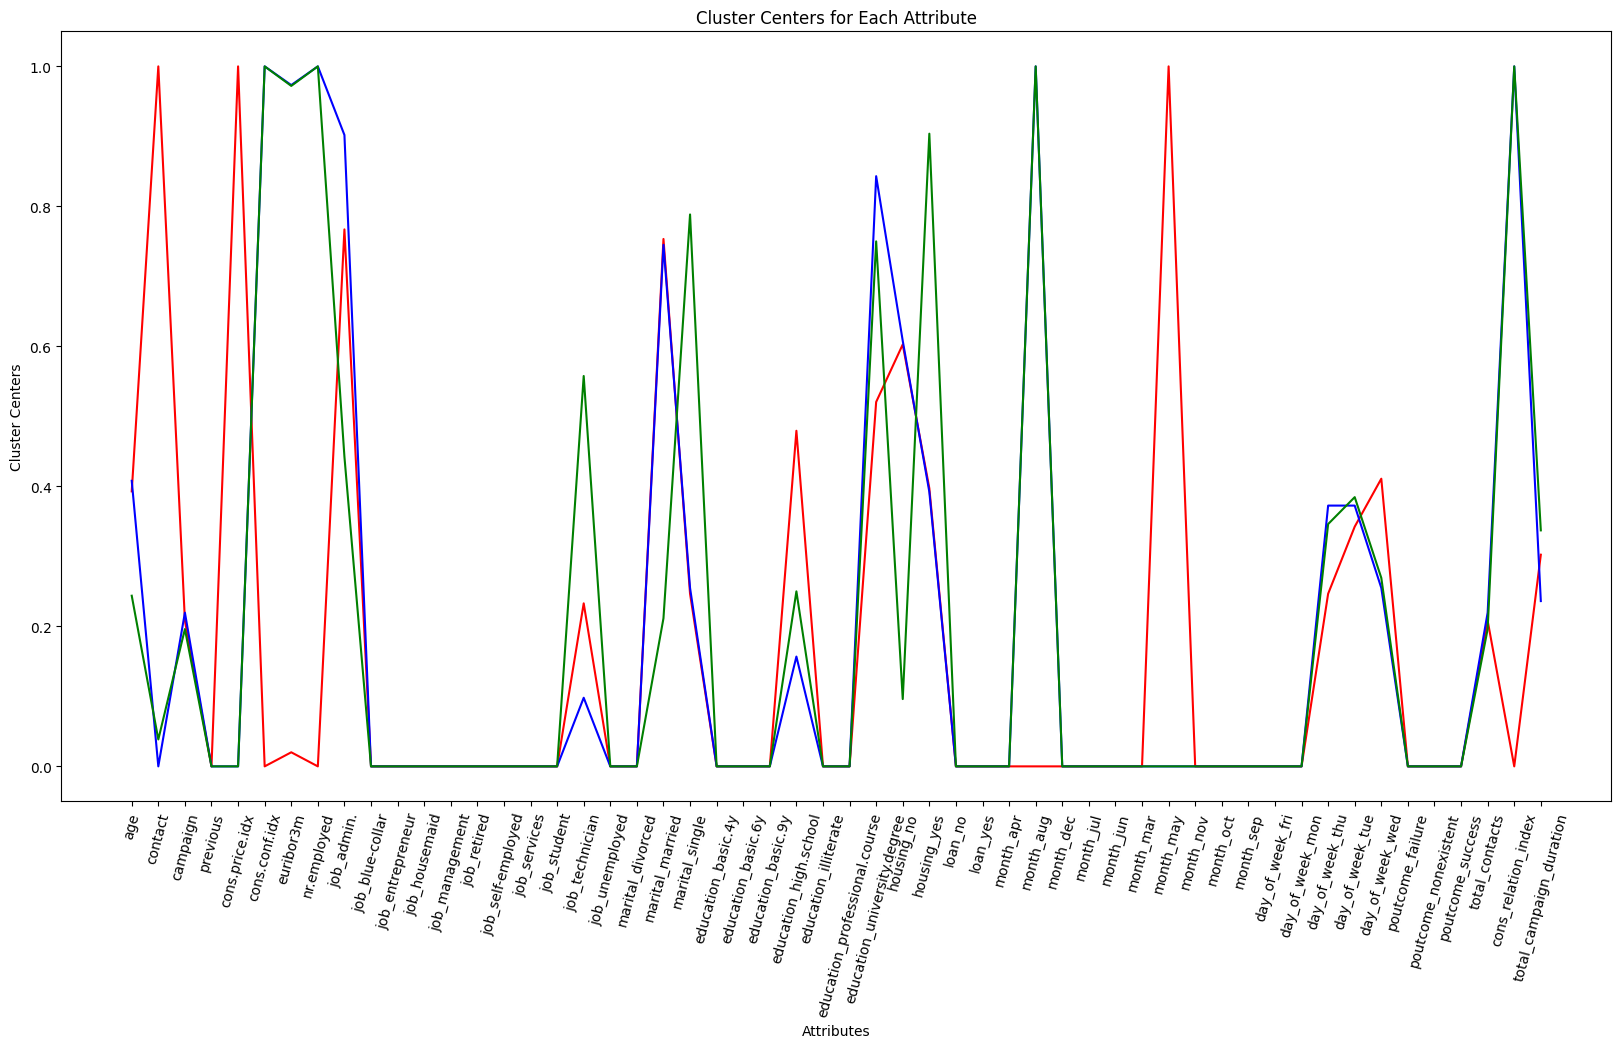

In [150]:
plt.rcParams['figure.figsize']=[20,10]
plt.plot(centers[0,:], c='r')
plt.plot(centers[1,:], c='b')
plt.plot(centers[2,:], c='g')
plt.xlabel('Attributes')
plt.ylabel('Cluster Centers')
plt.title('Cluster Centers for Each Attribute')
plt.xticks(list(range(54)), input_variables, rotation=75)
plt.show()


In [151]:
# Svaka linija na grafiku predstavlja centar jednog klastera
# X-osa predstavlja atribute u setu podataka
# Y-osa predstavlja vrednost centara klastera za dati atribut

#### 6.3) Odredjivanje najboljeg broja klastera

##### 6.3.1) Lakat metoda

In [152]:
sse = {}
#inicijalizovanje praznog recnika

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=100).fit(df_input)
    #Kreira se KMeans model sa trenutnim brojem klastera k i trenira se na podacima iz dataframe-a df_input
    
    cluster_labels = kmeans.labels_
    #print(data["clusters"])
    
    sse[k] = kmeans.inertia_
    #Izračunava se SSE za trenutni broj klastera i čuva se u rečniku sse sa ključem koji predstavlja broj klastera

# Metoda za odabir modela i broja klastera na osnovu SSE metrike
# izračunava sumu kvadratnih grešaka (SSE) za različit broj klastera kako bi se odabrao optimalan broj klastera za KMeans model

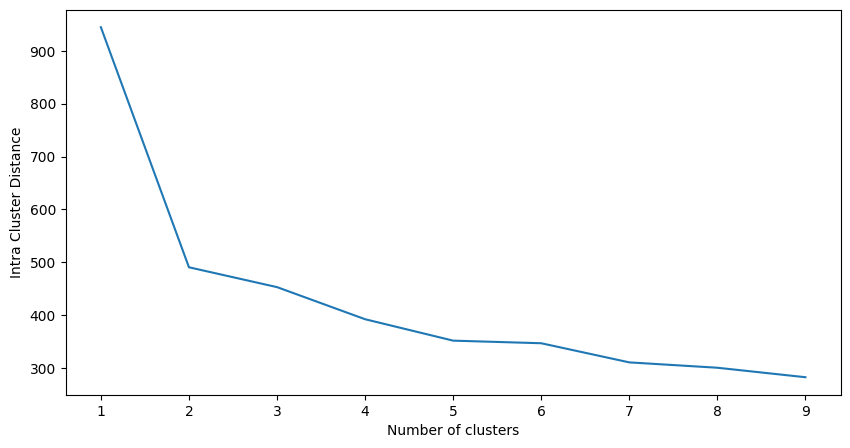

In [153]:
plt.close()
plt.rcParams['figure.figsize']=[10,5]
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Intra Cluster Distance")

plt.show()

In [154]:
# X-osa predstavlja broj klastera, a y-osa SSE vrednost za odgovarajuci broj klastera
# Optimalan broj klastera se nalazi na laktu prikazane linije (tacka gde SSE naglo usporava svoj pad)
# Optimalan broj klastera u ovom slucaju je 2

##### 6.3.2) Siluet indeks

In [155]:
silhouette_score(df_input, cluster_labels)

# Kombinuje mere homogenosti (unutar klastera) i sepracije (medju klasterima) kako bi izmerio kvalitet klastera
# Prikazuje koliko je svaka instanca udaljena od svog klastera u odnosu na to koliko je udaljena od njenog najblizeg klastera


0.2102309889622777

In [156]:
# Ova vrednost nam govori da treba da preispitamo da li klasterovanje moze da bude korisno u ovom slucaju

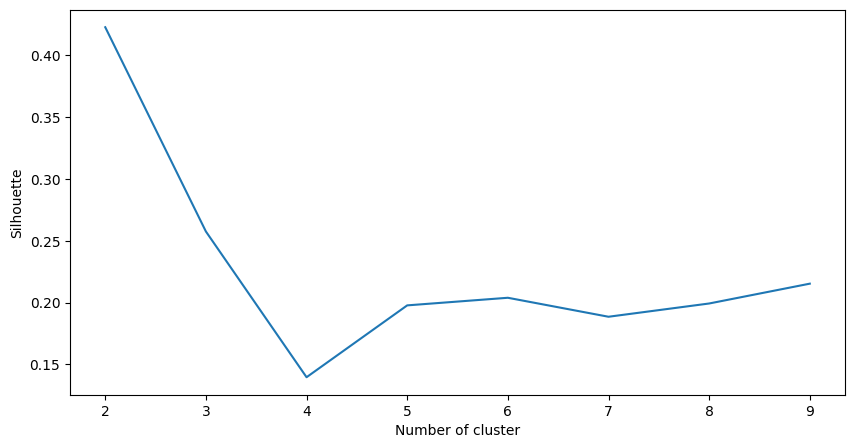

In [157]:
sse = {}
#kreiranje prasnog recnika koji ce sadrzati vrednosti Silhouette indeksa za razl brojeve klastera
for k in range(2, 10):
    
    kmeans = KMeans(n_clusters=k, max_iter=100).fit(df_input)
    #inicijalizacija KMeans objekta sa odg brojem klastera, a nakog toga treniranje
    
    cluster_labels = kmeans.fit_predict(df_input)
    #predikcija klastera
    
    sse[k] = silhouette_score(df_input, cluster_labels)

plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette")
plt.show()

In [158]:
# Mozemo da vidimo da siluet funkcija nije monotona
# Najbolji model je model sa 2 klastera jer ima najvecu SI vrednost

In [159]:
for k, v in sse.items():
    print(f"Number of clusters: {k}, Silhouette score: {v}")

Number of clusters: 2, Silhouette score: 0.4225894455611303
Number of clusters: 3, Silhouette score: 0.2574874565523784
Number of clusters: 4, Silhouette score: 0.13970888331063042
Number of clusters: 5, Silhouette score: 0.19777832242447027
Number of clusters: 6, Silhouette score: 0.20392483699539152
Number of clusters: 7, Silhouette score: 0.1885871274140973
Number of clusters: 8, Silhouette score: 0.19929931785964936
Number of clusters: 9, Silhouette score: 0.21532414778360282


In [160]:
#I definitvno nakon ucitanih vrednosti iz recnika mozemo da broj klastera 2 daje najbolje rezultate